In [78]:
# Title: EE559 Final Project
# Part 2: ERCOT Monthly Average Load Forecast by LASSO regression with polynomial basis
# Author: Xinghua Ren, Liyang Zhang

In [79]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

# seaborn settings
sns.reset_defaults()
sns.set(color_codes = True)

In [80]:
# Read data

# Read excel files as DataFrame
# files_xls, files_xlsx defined for two formats of excel files
files = os.listdir()
files.sort()

files_xls = [f for f in files if f[-8:] == "Data.xls"]
files_xlsx = [f for f in files if f[-9:] == "Data.xlsx"]

df_xls = pd.DataFrame()
df_xlsx = pd.DataFrame()

titles = ["Hour_End", "ERCOT"]

for f in files_xls:
    data_xls = pd.read_excel(f, usecols = titles)
    df_xls = df_xls.append(data_xls)
    
for f in files_xlsx:
    data_xlsx = pd.read_excel(f, usecols = titles)
    df_xlsx = df_xlsx.append(data_xlsx)
    
df = df_xls.append(df_xlsx)

# Convert the DataFrame to a NumPy array
data_raw = df.to_numpy()

print(data_raw.shape)

(148920, 2)


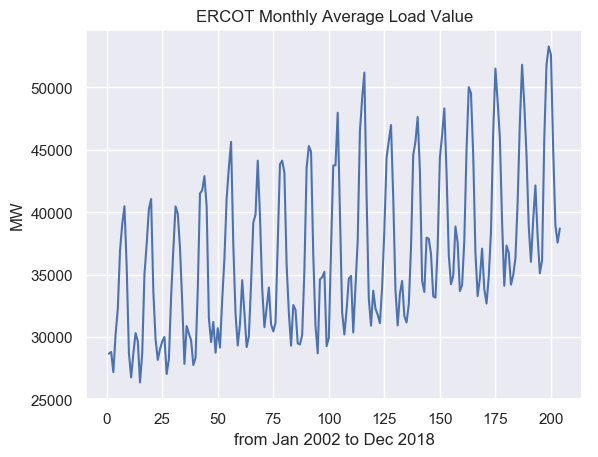

In [70]:
# Plot data

# data_x for each month from 2002 to 2018
data_x = np.array([range(1, 205)]).T

# Calculate average load value of ERCOT for each month
data_ercot = data_raw[:, 1]
data_y = np.mean(data_ercot.reshape(-1, 730), axis = 1) # 8760 / 12 = 730
data_y = np.expand_dims(data_y, axis = 1)

plt.plot(data_x, data_y)
plt.title("ERCOT Monthly Average Load Value")
plt.xlabel("from Jan 2002 to Dec 2018")
plt.ylabel("MW")
plt.show()

In [71]:
# function to create and combine sine and cosine features
# n means how many years of data
def sine_cosine_feature(data_x, n):
    sine = []
    cosine = []
    for i in range (1, 13):
        sine.append(np.sin(np.deg2rad(i * 30)))
        cosine.append(np.cos(np.deg2rad(i * 30)))

    sine = np.expand_dims(np.tile(np.asarray(sine), n), axis = 1)
    cosine = np.expand_dims(np.tile(np.asarray(cosine), n), axis = 1)

    data_x = np.concatenate((data_x, sine, cosine), axis = 1)    
    return data_x

data_x = sine_cosine_feature(data_x, 17)

In [72]:
# train test 13:4 split

train_size = 156
x_train_raw, x_test_raw = data_x[0:train_size], data_x[train_size:len(data_x)]
y_train_raw, y_test_raw = data_y[0:train_size], data_y[train_size:len(data_y)]

In [73]:
# function to generate polynomial basis and calculate MAE, MAPE

def poly_basis_single_sample(x, k):
    out = []
    for i in range(k + 1):
        out.append(np.power(x, i))
    return(np.asarray(out))

def mean_absolute_error(y_true, y_pred): 
    return np.mean(np.abs(y_true - y_pred))

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

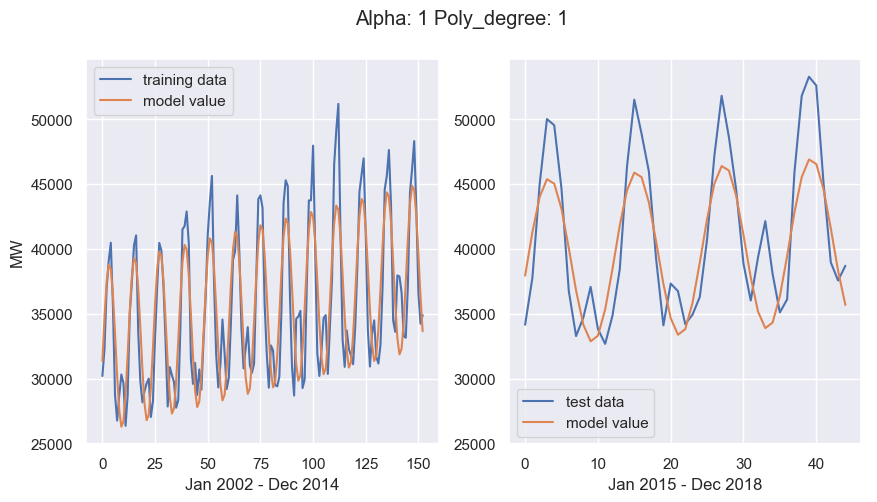

test MAE:  6290.350883491216
test MAPE:  15.079861844883219


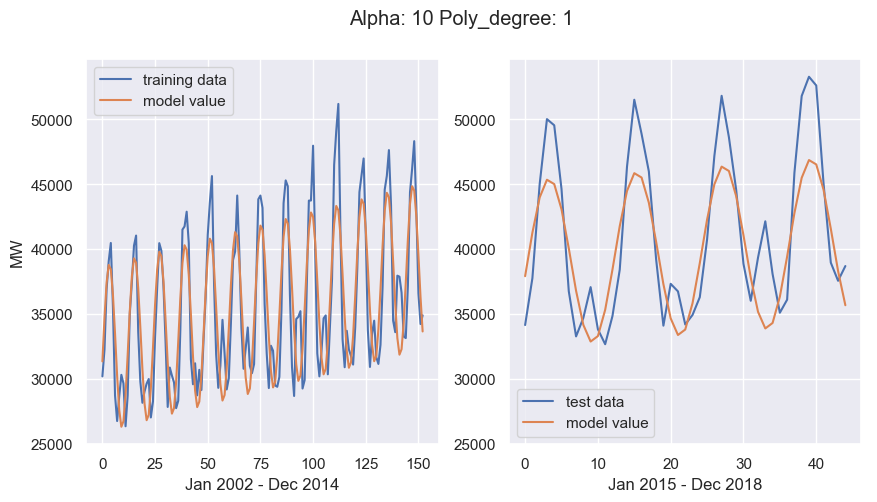

test MAE:  6285.635528997529
test MAPE:  15.063899967783161


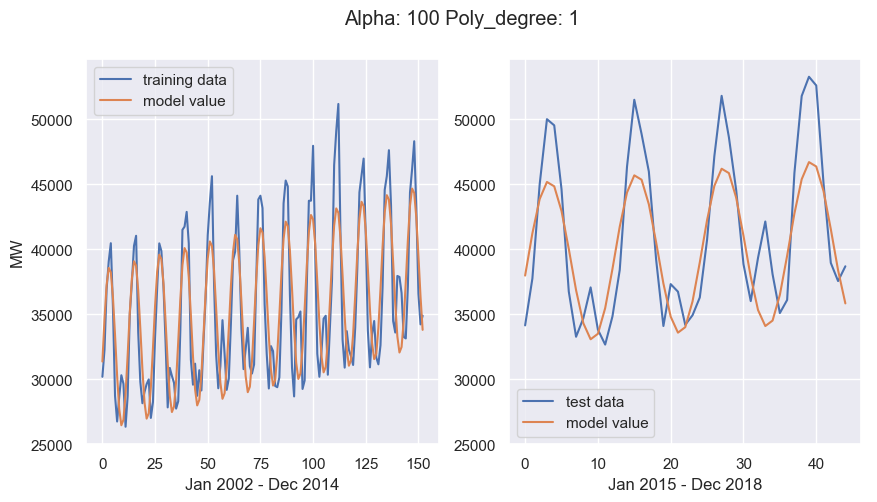

test MAE:  6226.854713894885
test MAPE:  14.914125570518419


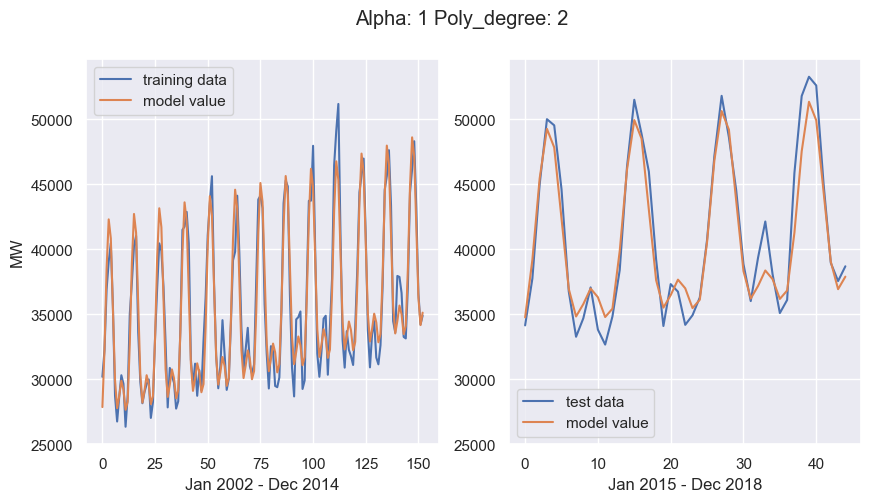

test MAE:  6469.267894508588
test MAPE:  15.572682540730447


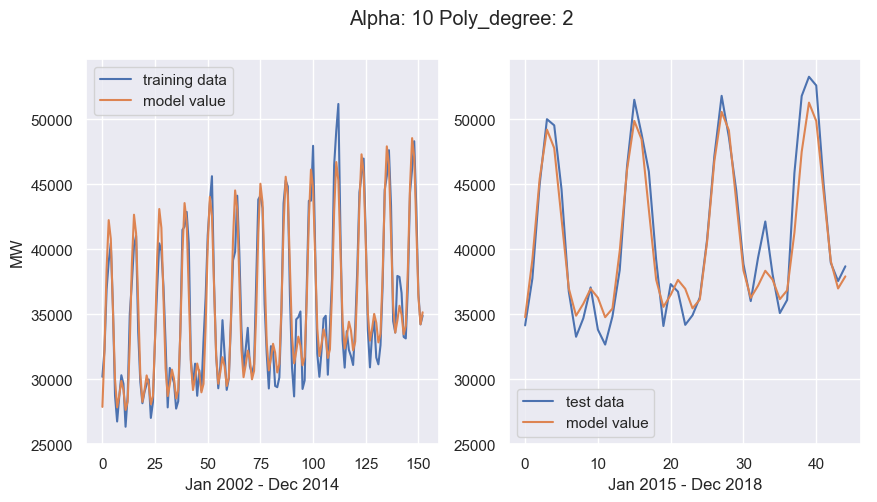

test MAE:  6457.628151267326
test MAPE:  15.543332655503542


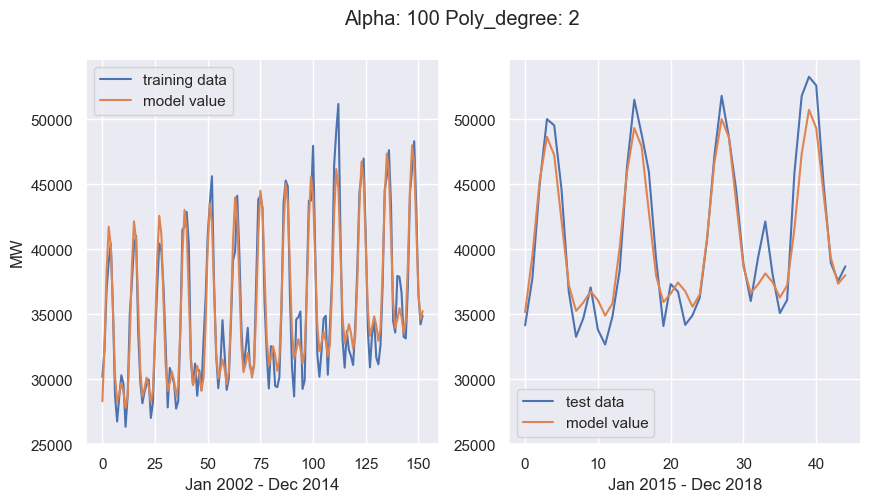

test MAE:  6349.392727830082
test MAPE:  15.277478541708197


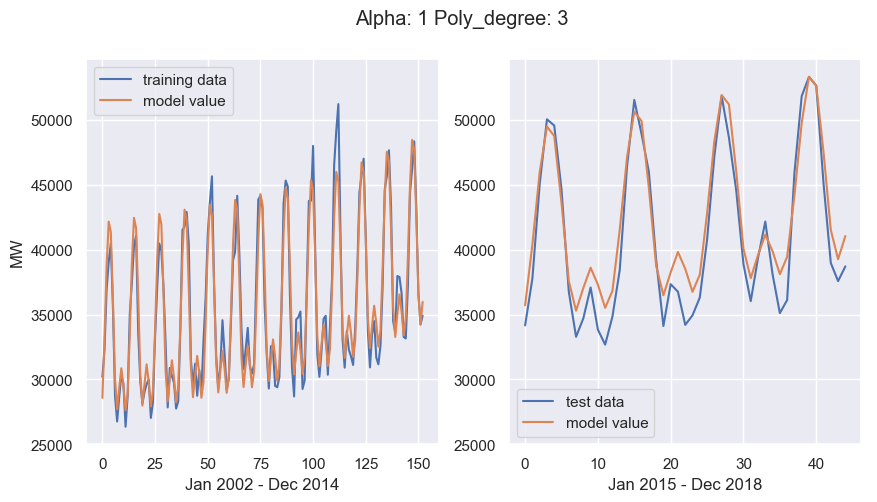

test MAE:  6676.411431653281
test MAPE:  16.502310171405213


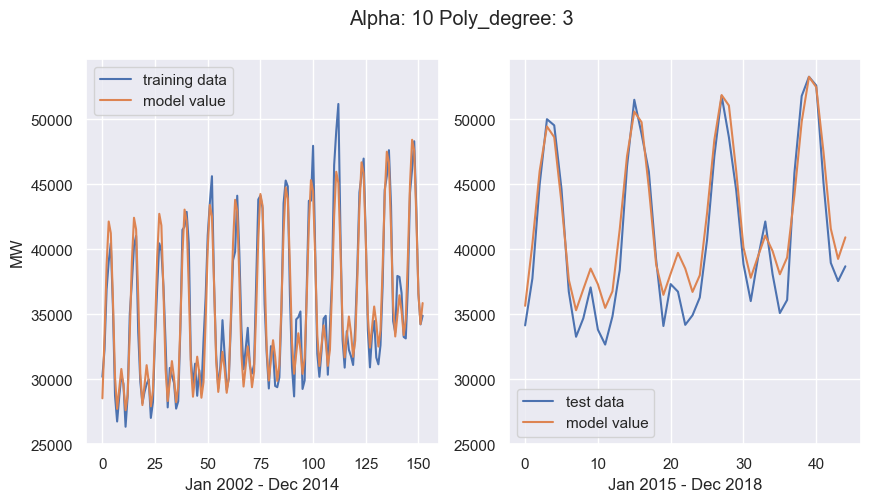

test MAE:  6673.2219844929505
test MAPE:  16.493233709356637


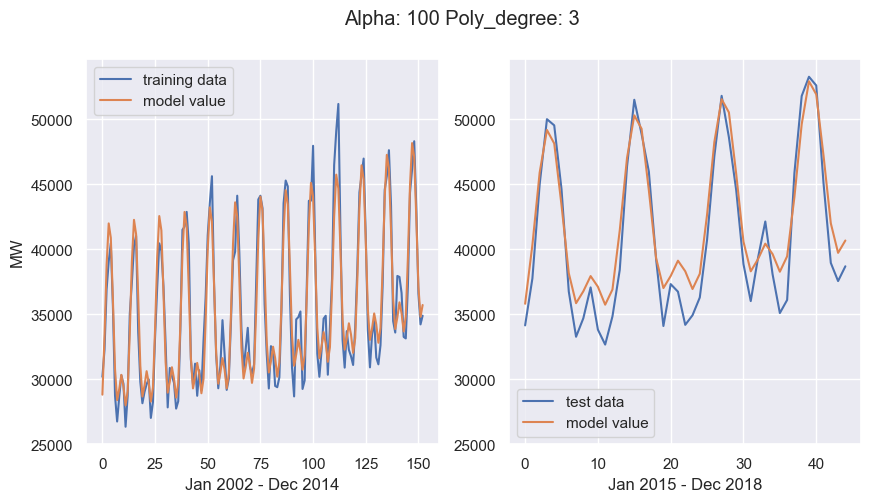

test MAE:  6578.939615273017
test MAPE:  16.248352157614967


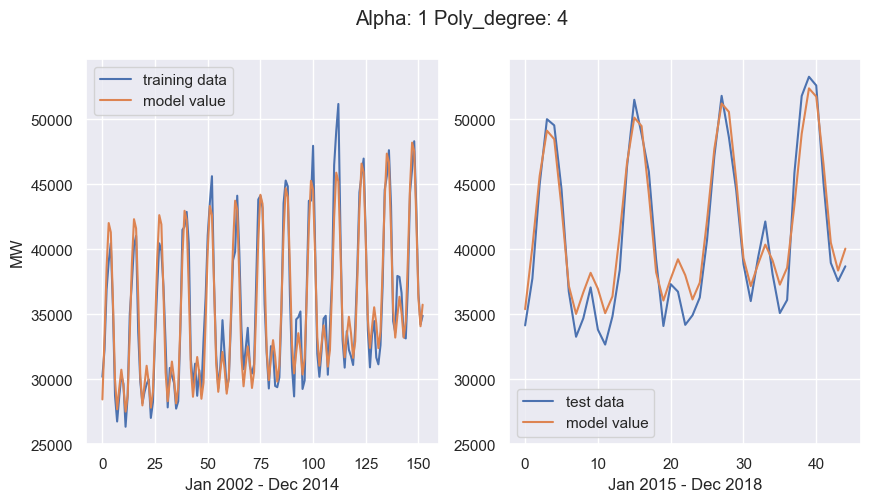

test MAE:  6561.057294964069
test MAPE:  16.0771414032867


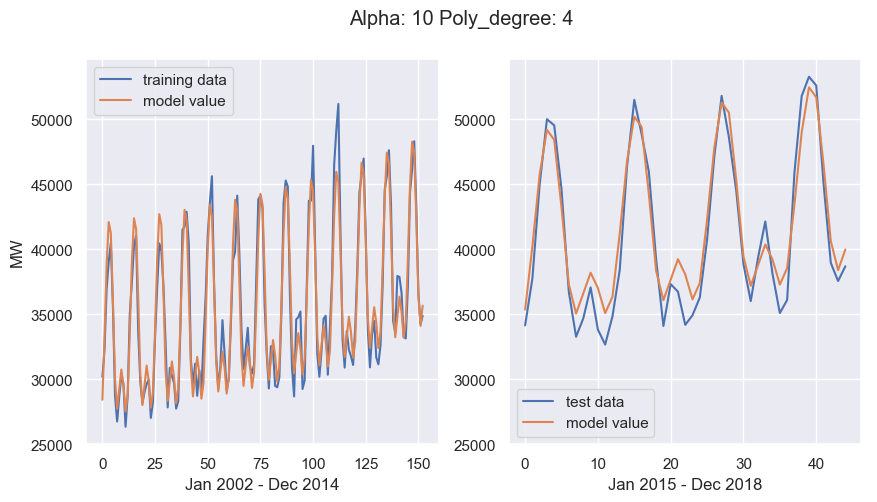

test MAE:  6568.7535389601935
test MAPE:  16.101823895151913


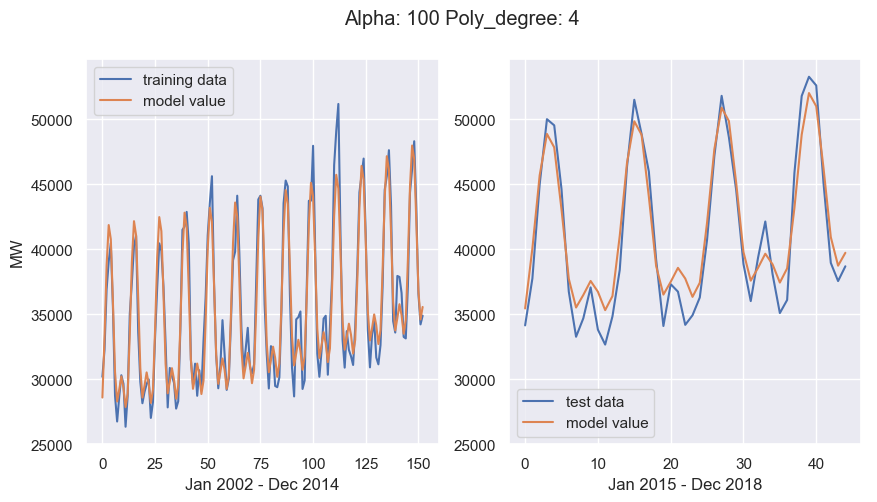

test MAE:  6466.775272543537
test MAPE:  15.81969208338601


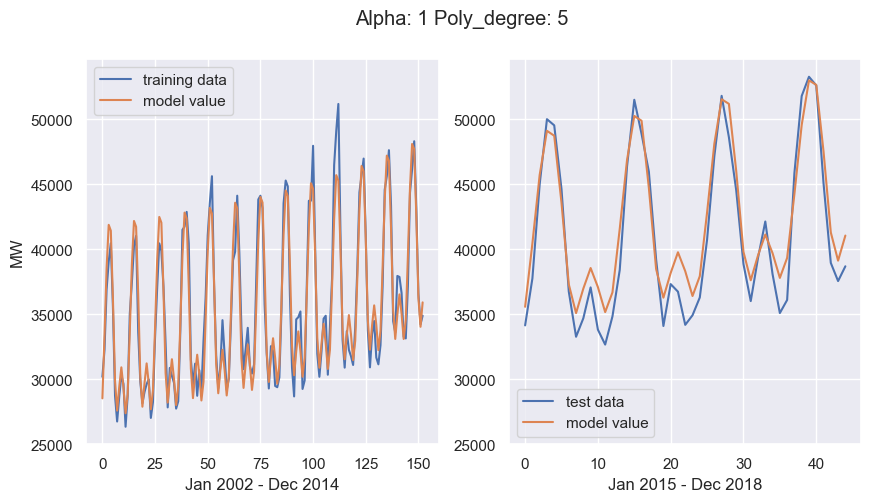

test MAE:  6663.93160713869
test MAPE:  16.444802106053103


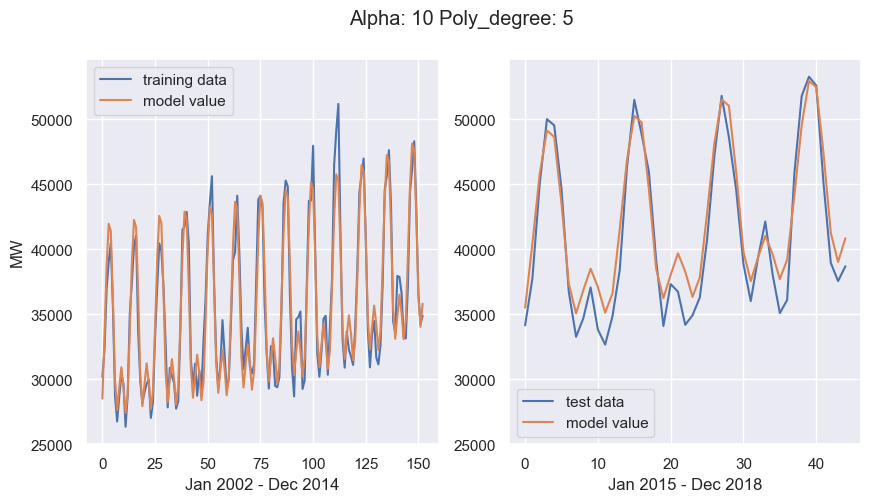

test MAE:  6652.128312111636
test MAPE:  16.39998383562967


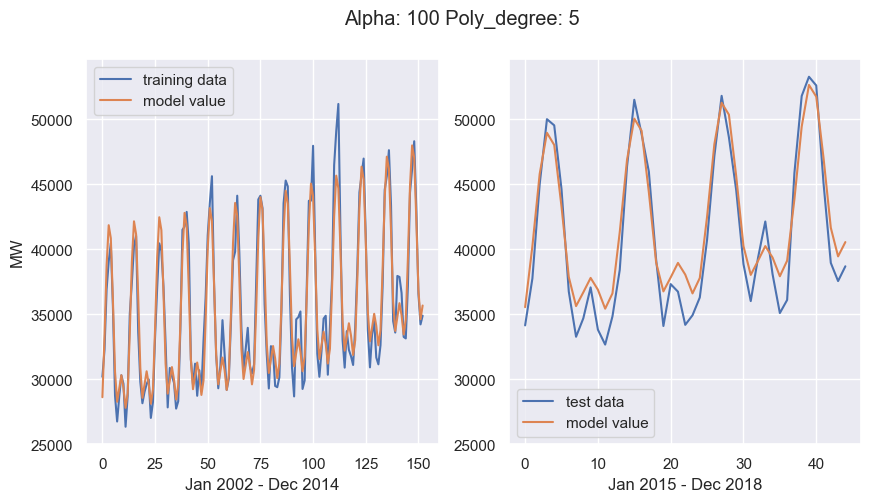

test MAE:  6551.193989245852
test MAPE:  16.125983351220857


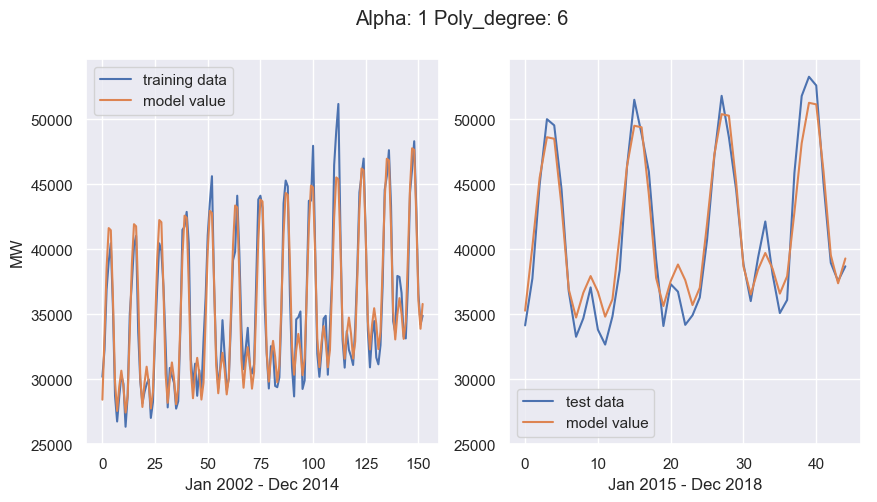

test MAE:  6497.546170060355
test MAPE:  15.82165501525101


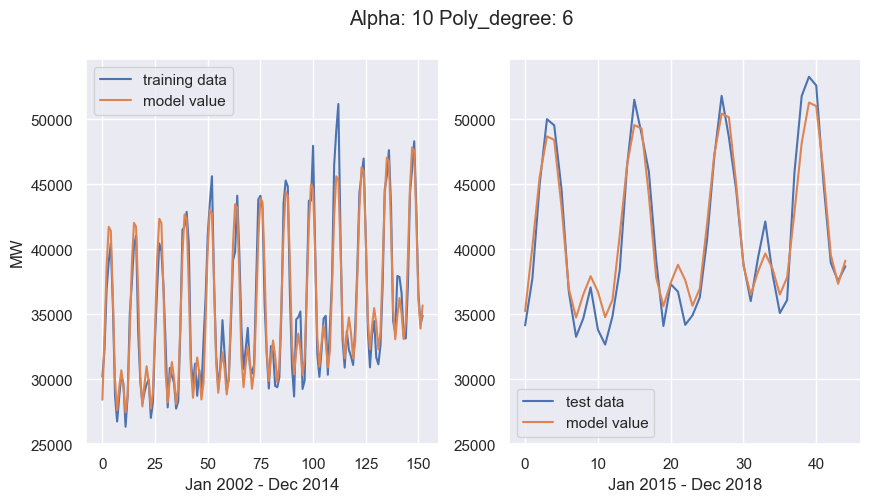

test MAE:  6497.387697149251
test MAPE:  15.813108569272696


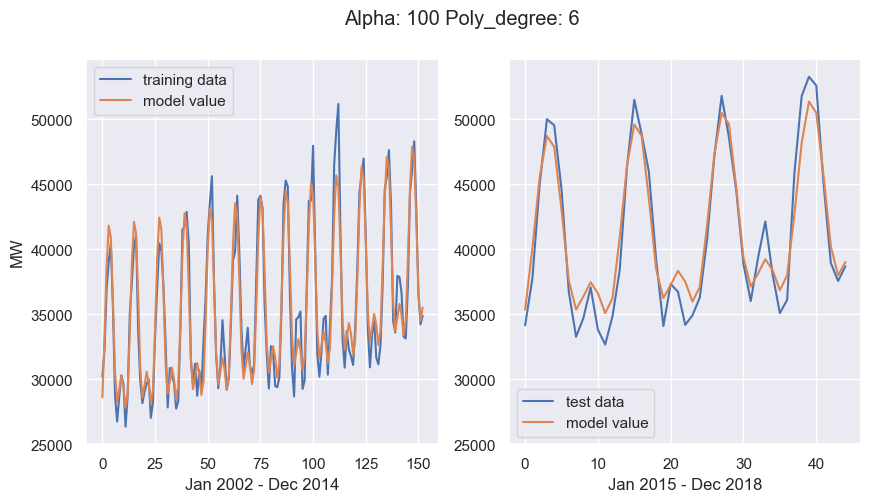

test MAE:  6423.383128411221
test MAPE:  15.634720390866185


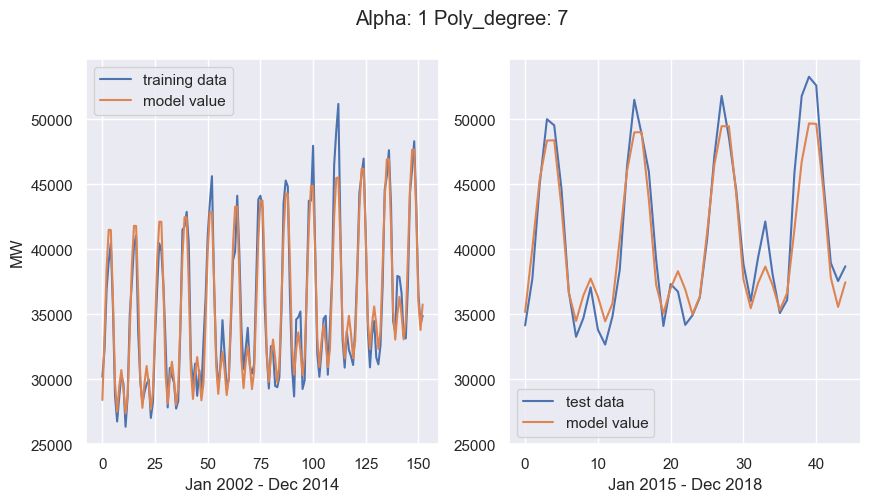

test MAE:  6449.323460465266
test MAPE:  15.519650536307255


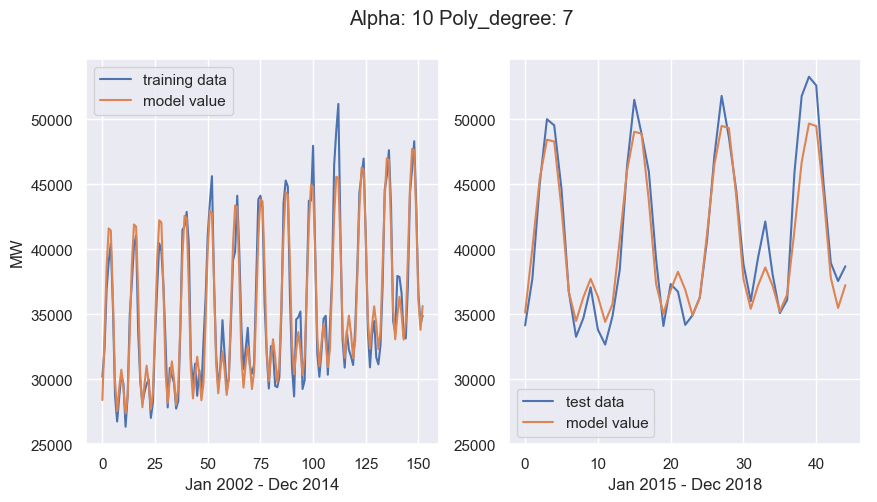

test MAE:  6452.9215043461945
test MAPE:  15.515658267254247


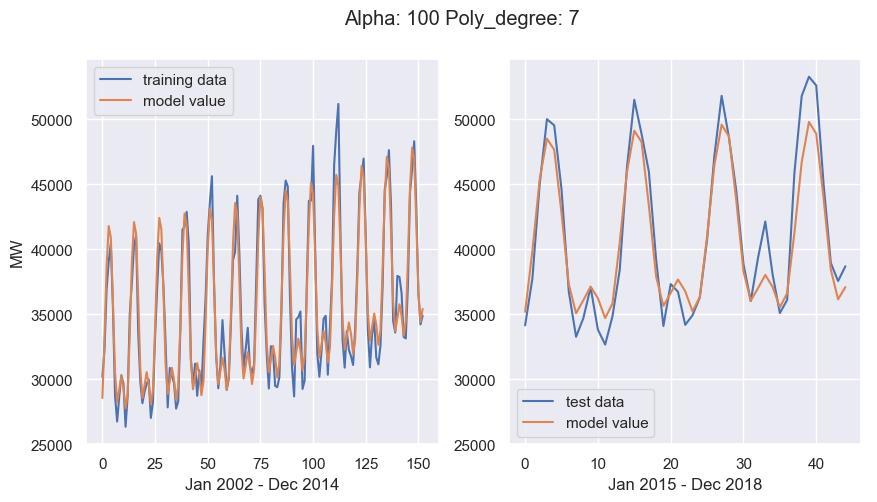

test MAE:  6369.015646931964
test MAPE:  15.294790498895065


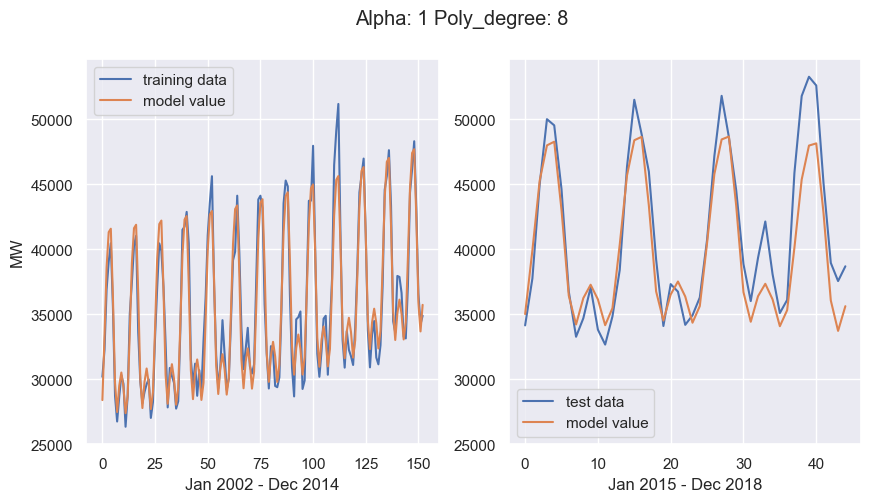

test MAE:  6501.3060235310295
test MAPE:  15.471375604227813


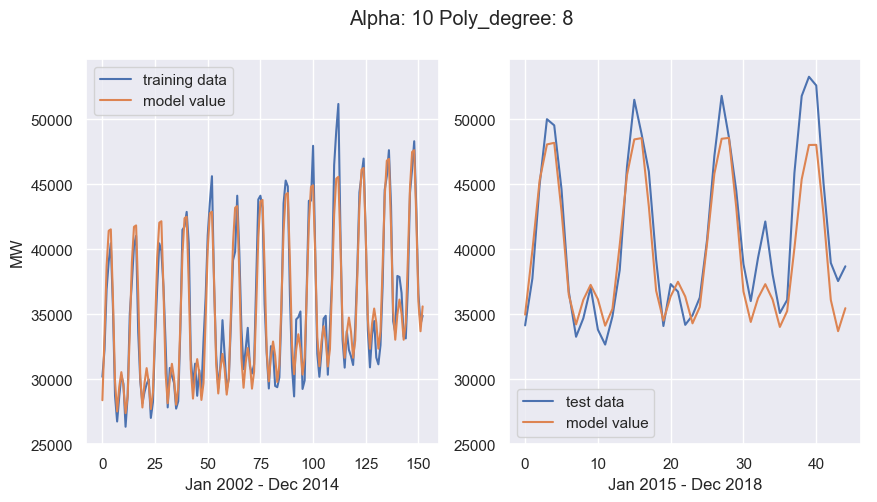

test MAE:  6508.428965416867
test MAPE:  15.482713147711097


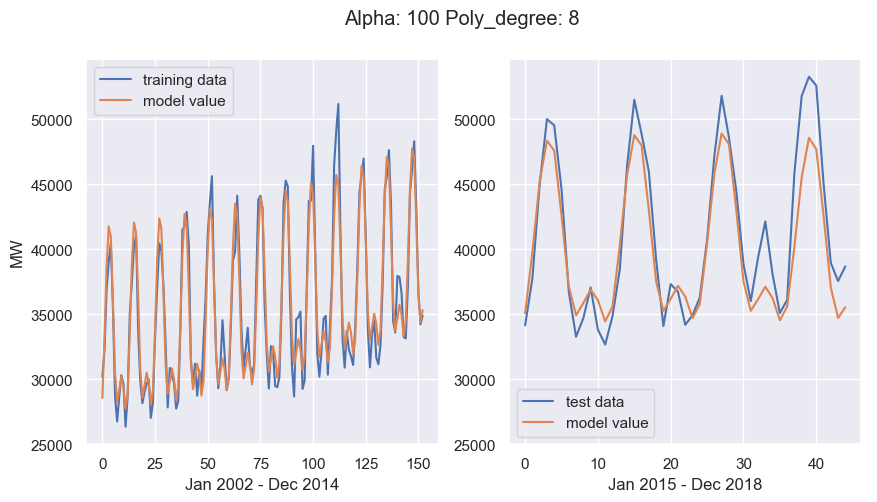

test MAE:  6402.331099038698
test MAPE:  15.238201841316087


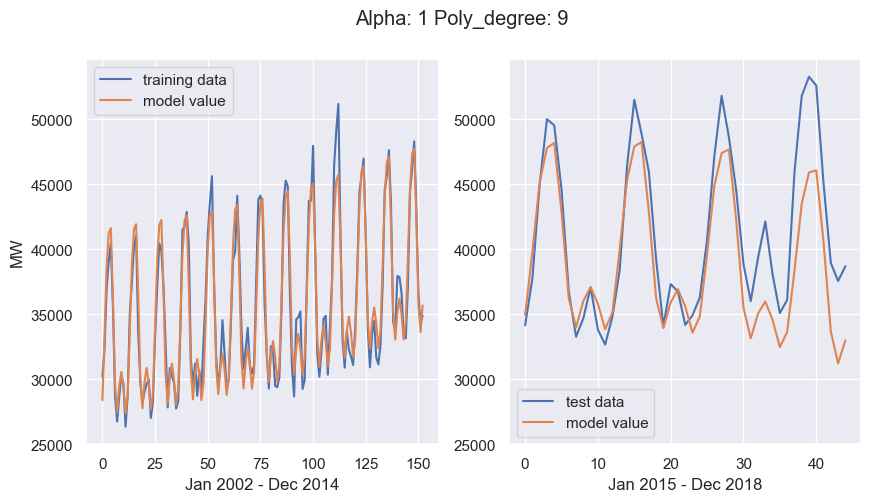

test MAE:  6717.934600849162
test MAPE:  15.830174498380622


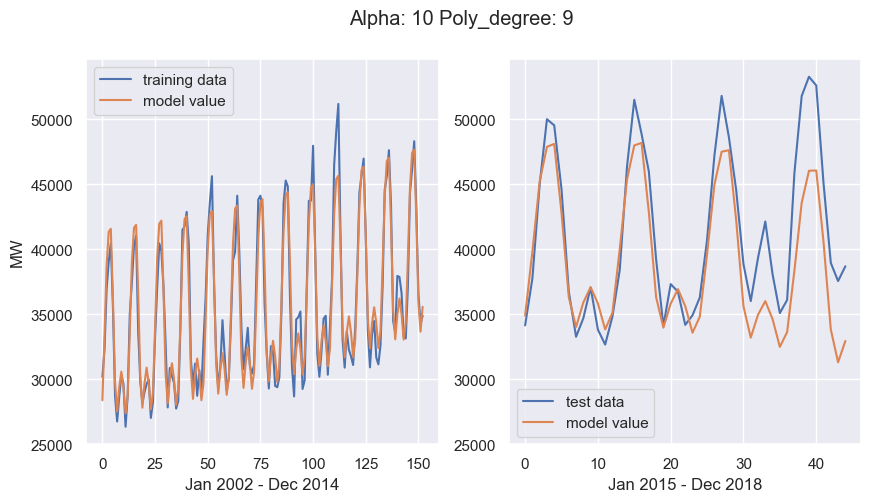

test MAE:  6714.7760973592185
test MAPE:  15.824606517281659


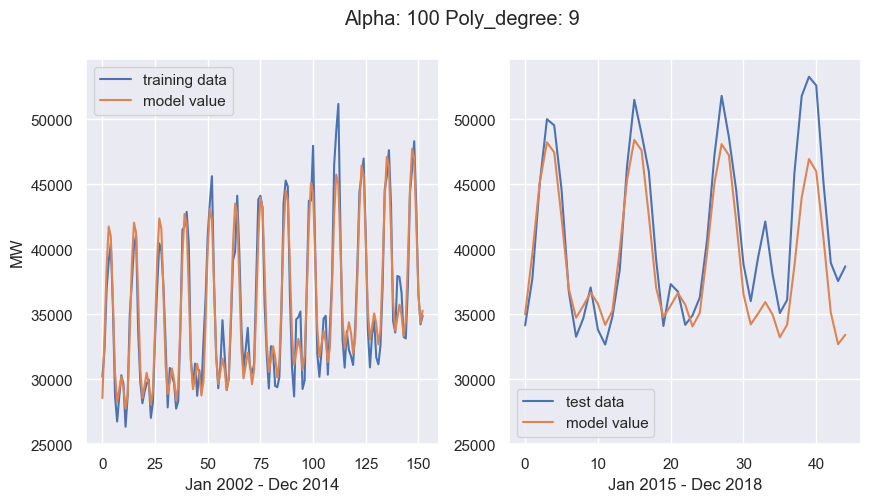

test MAE:  6542.460998122574
test MAPE:  15.421680197470952


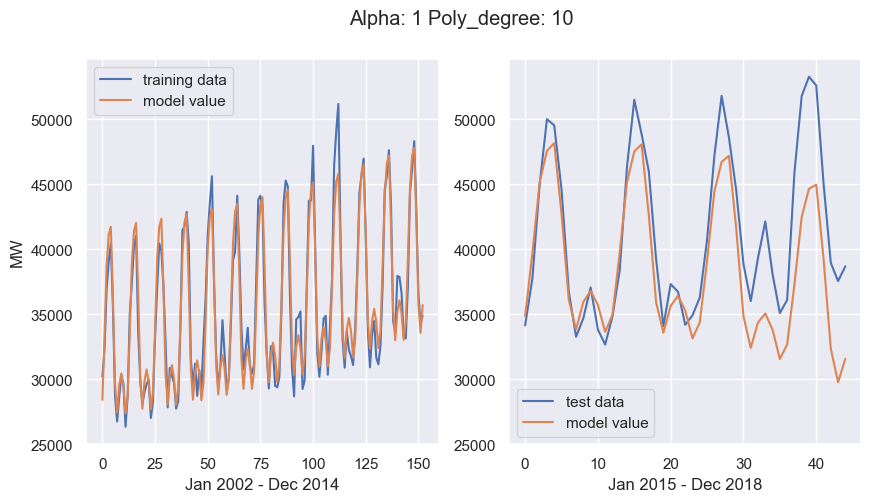

test MAE:  6898.033268917602
test MAPE:  16.18837131304042


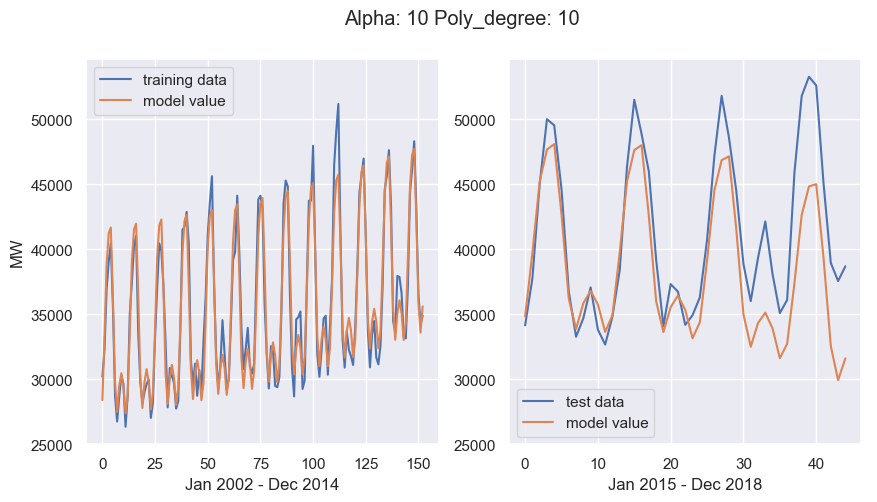

test MAE:  6884.618546408897
test MAPE:  16.16130276086296


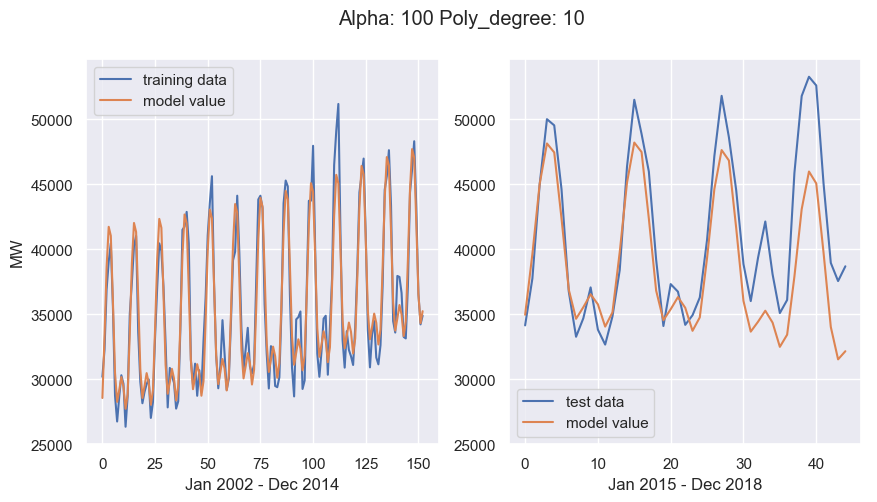

test MAE:  6667.833290101894
test MAPE:  15.657903170474368


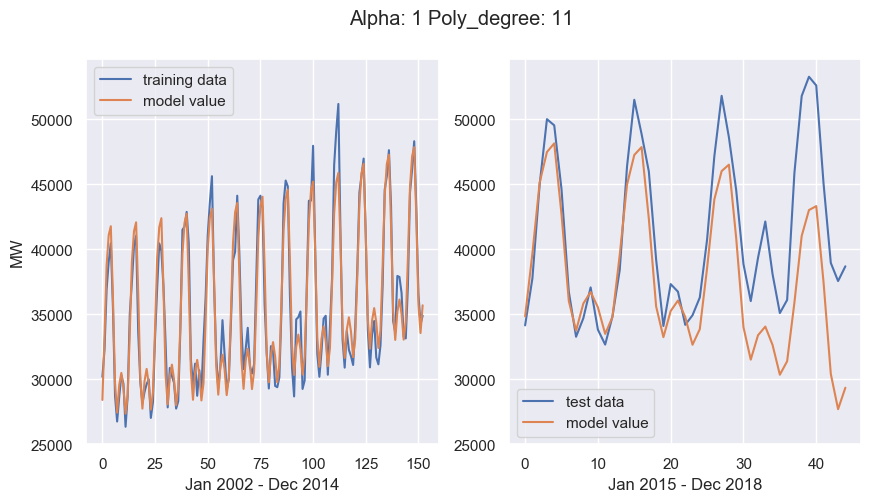

test MAE:  7198.603314599096
test MAPE:  16.835379464283264


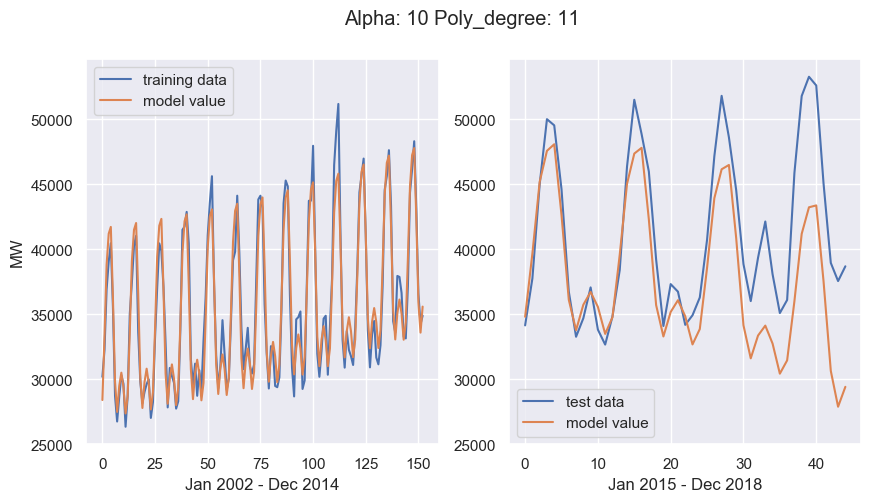

test MAE:  7176.444311352228
test MAPE:  16.787089039681565


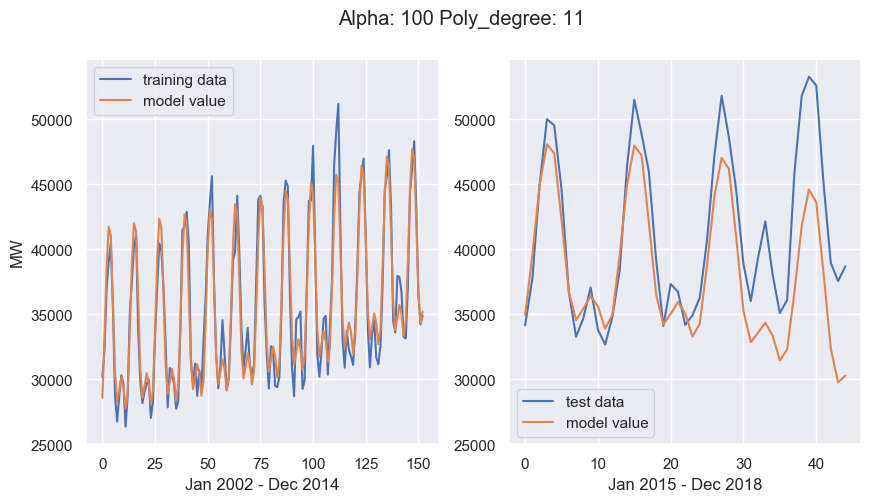

test MAE:  6898.693806248876
test MAPE:  16.13385521313876


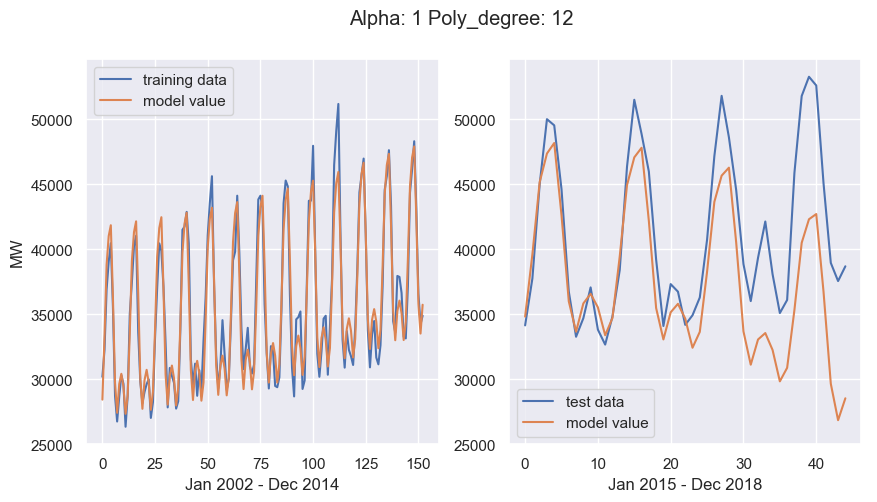

test MAE:  7331.653278029054
test MAPE:  17.127710090957706


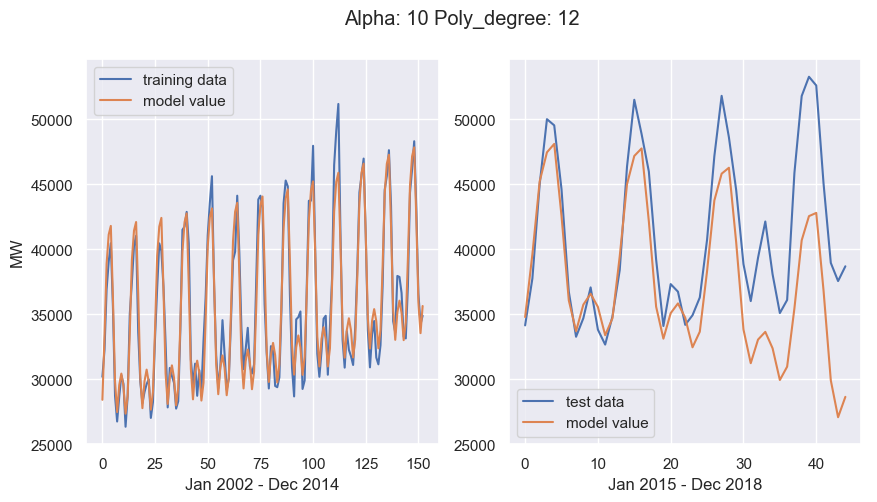

test MAE:  7302.807177362605
test MAPE:  17.06430371844402


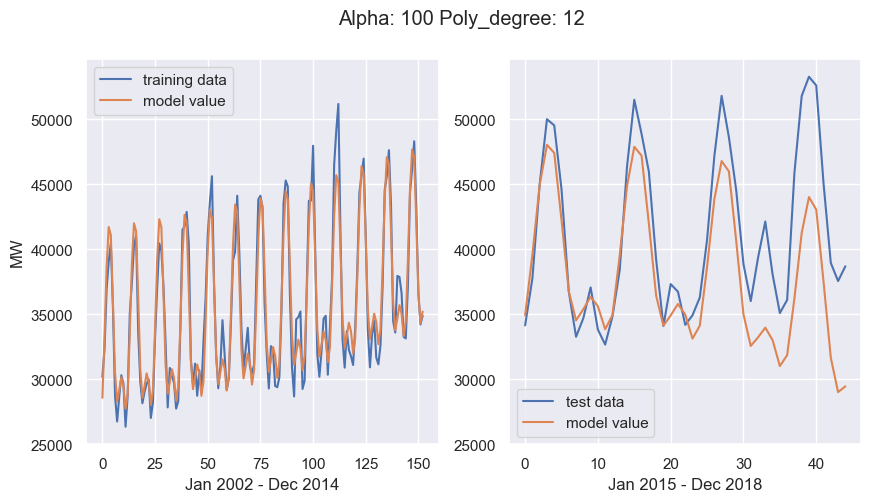

test MAE:  7004.3037149640995
test MAPE:  16.361932163247495


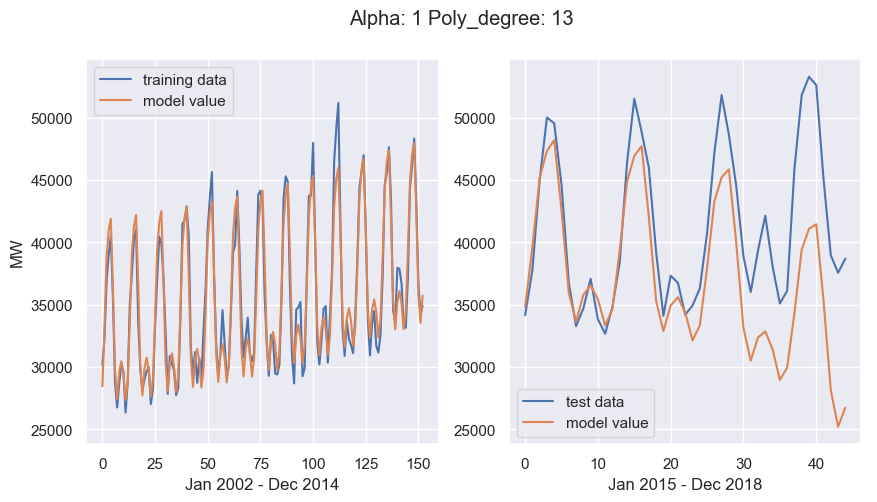

test MAE:  7589.414170928693
test MAPE:  17.709133741412927


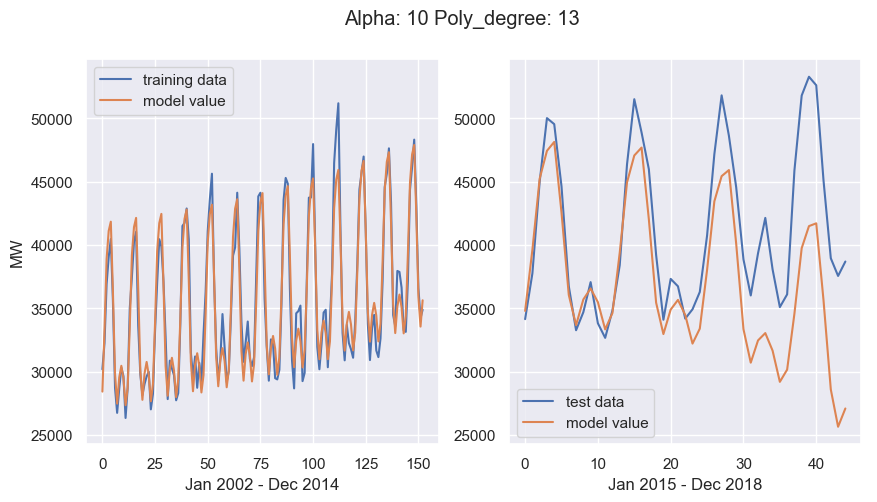

test MAE:  7521.024267301773
test MAPE:  17.555913298433488


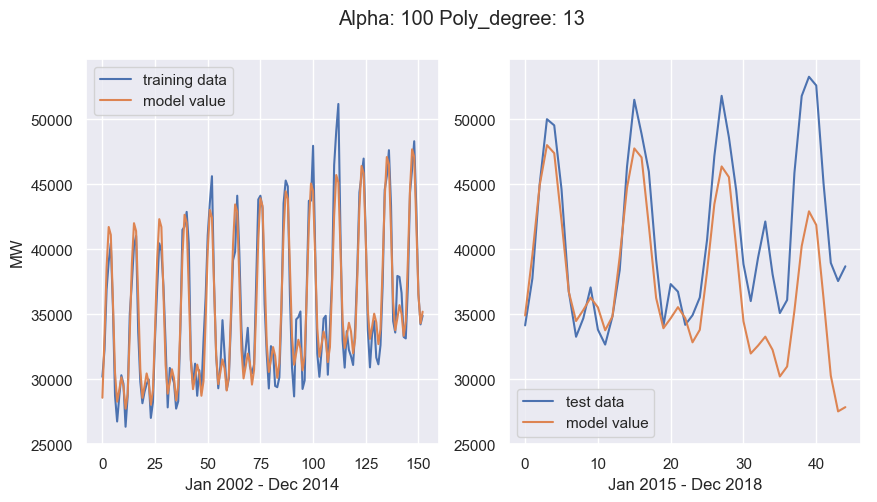

test MAE:  7226.563889706824
test MAPE:  16.852686926845124


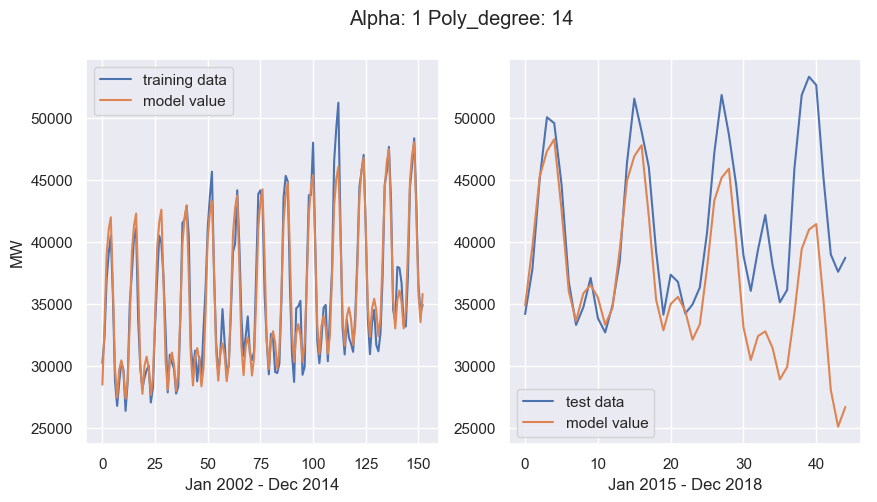

test MAE:  7607.383763548558
test MAPE:  17.7502410264957


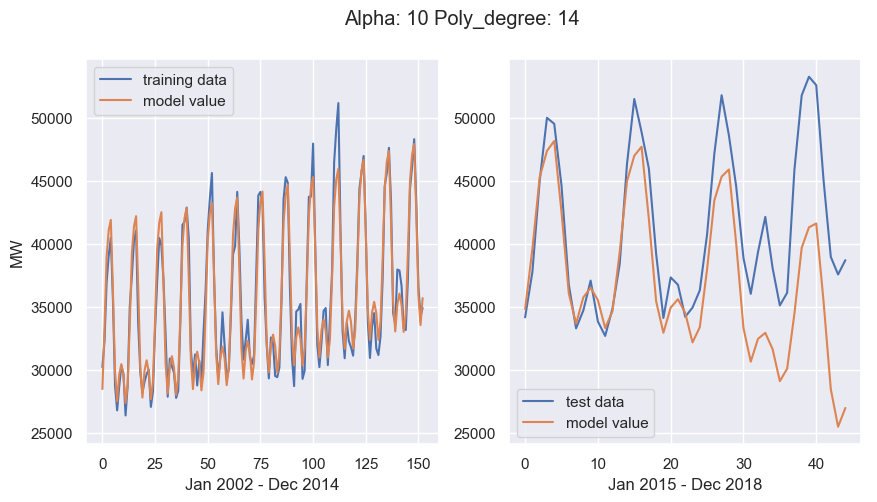

test MAE:  7550.9209551401245
test MAPE:  17.62361173009096


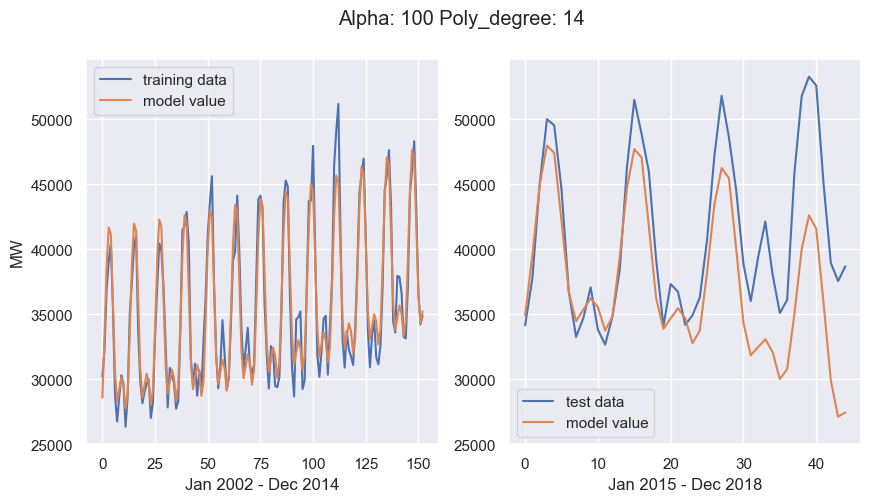

test MAE:  7282.212805181342
test MAPE:  16.977842841870583


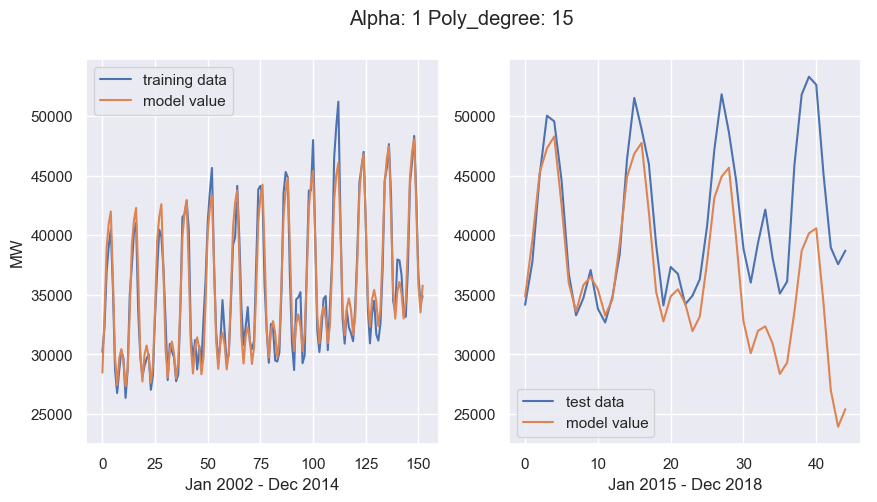

test MAE:  7780.5360401653425
test MAPE:  18.150059069308863


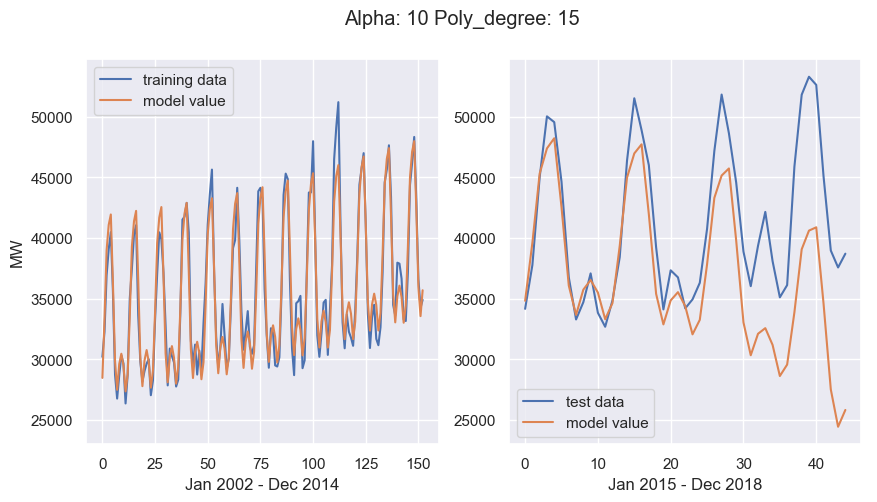

test MAE:  7698.973151917437
test MAPE:  17.96435947975146


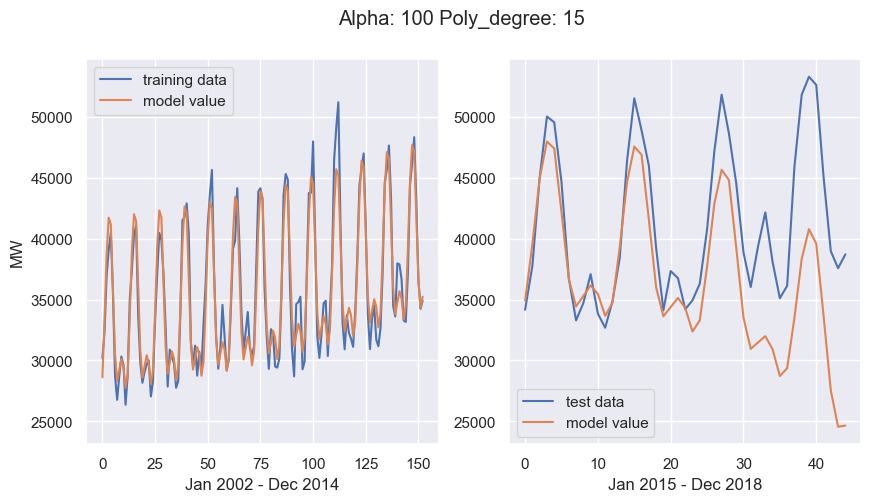

test MAE:  7693.986173239782
test MAPE:  17.915644210762057


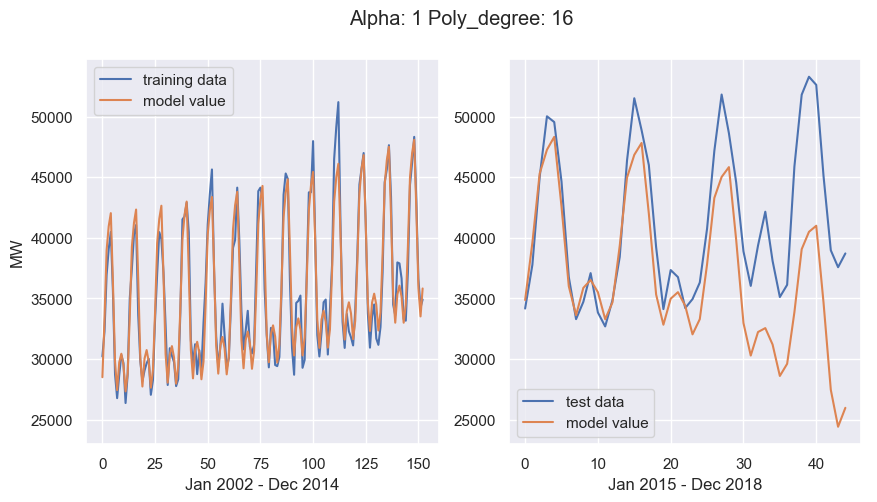

test MAE:  7698.824551851687
test MAPE:  17.963945169950016


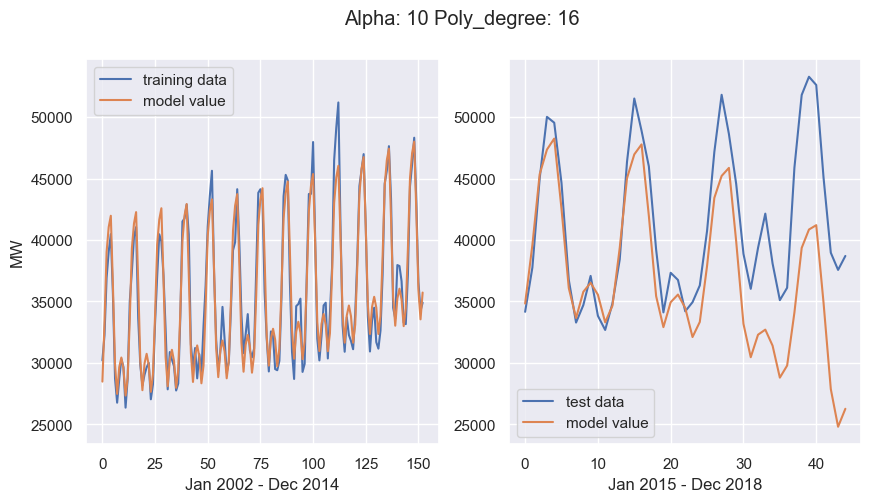

test MAE:  7636.240614762169
test MAPE:  17.82190976440086


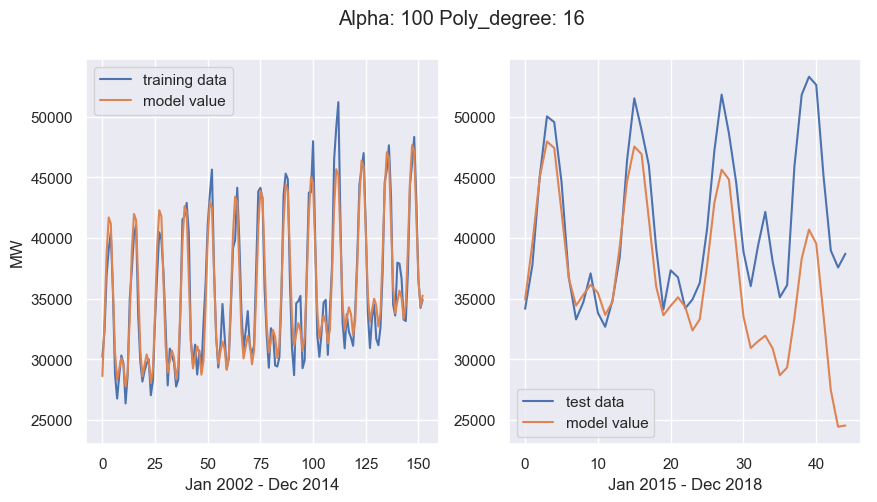

test MAE:  7703.9868466160615
test MAPE:  17.940092455638016


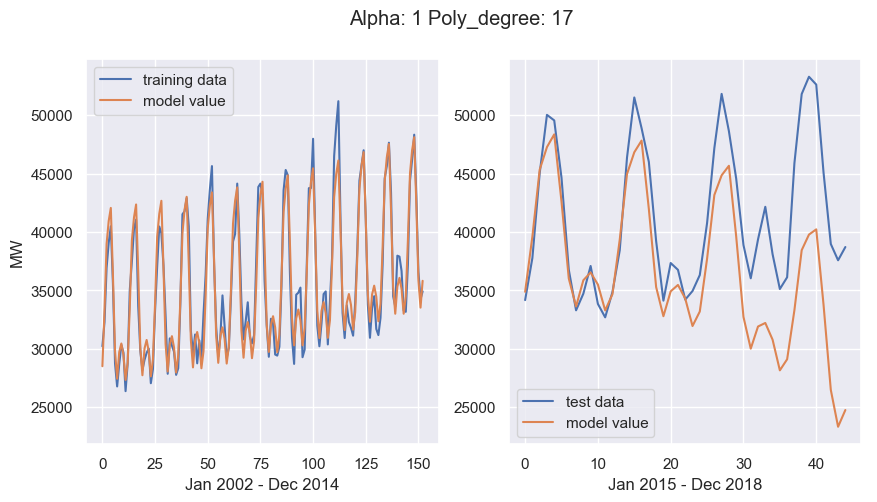

test MAE:  7855.3141587568925
test MAPE:  18.329280528875294


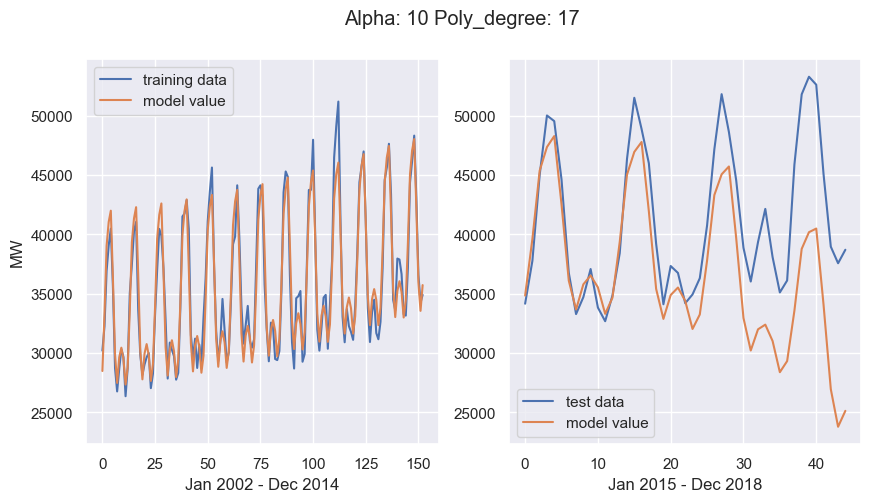

test MAE:  7777.4461090716895
test MAPE:  18.150756011572796


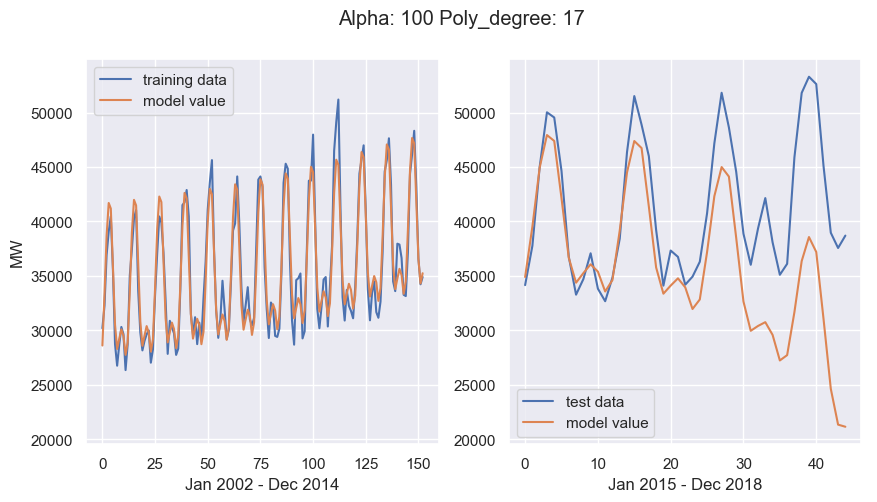

test MAE:  8233.896736748884
test MAPE:  19.18121278714158


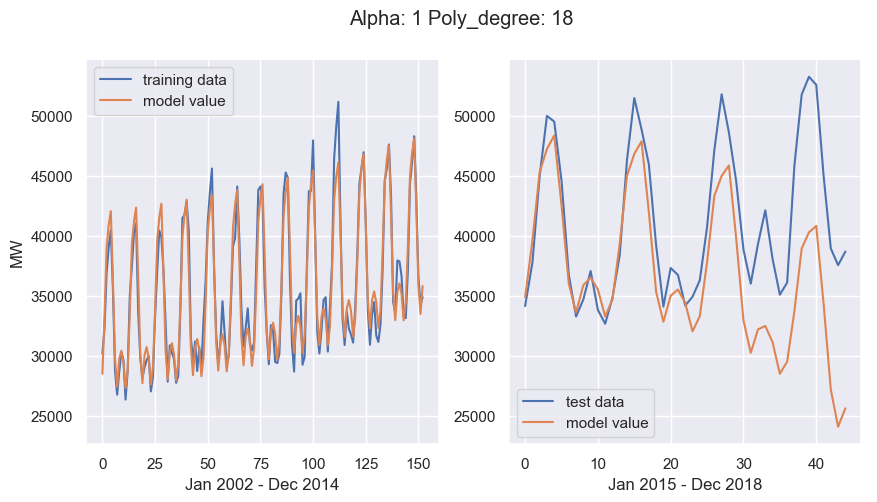

test MAE:  7726.787166380076
test MAPE:  18.0337764715805


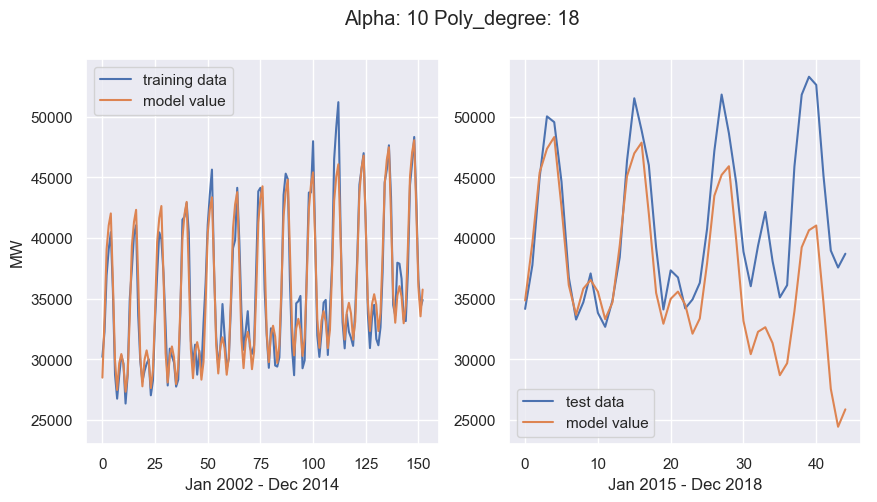

test MAE:  7670.282692872891
test MAPE:  17.905231149585042


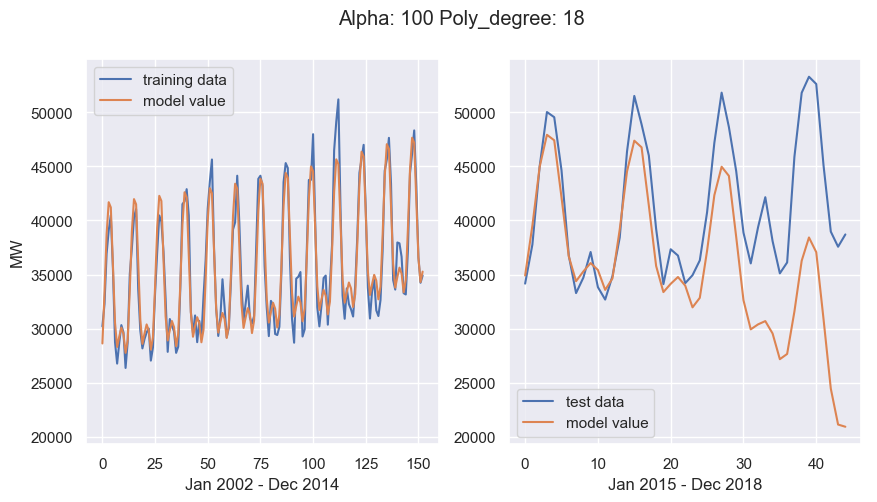

test MAE:  8263.297622316612
test MAPE:  19.252296134223542


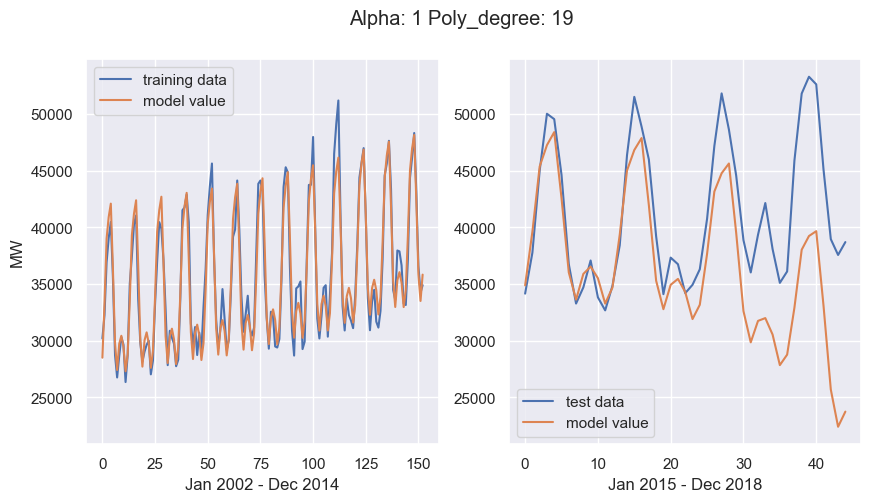

test MAE:  7964.063703049947
test MAPE:  18.589144396336867


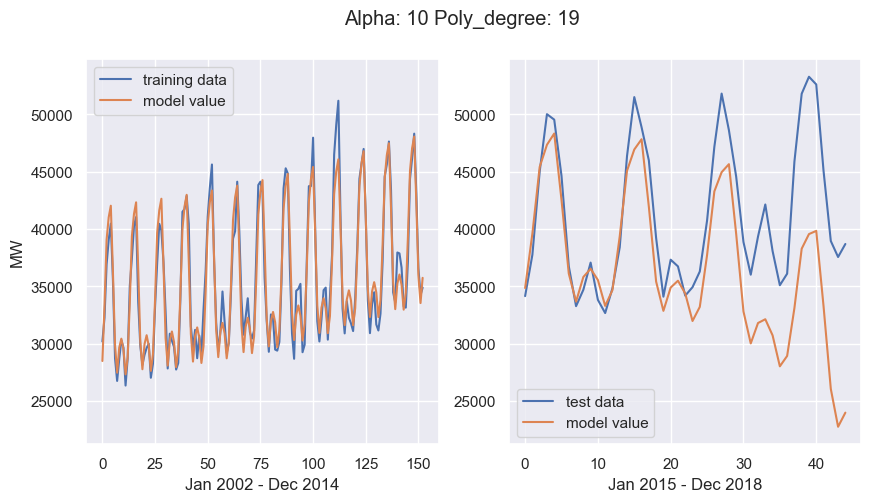

test MAE:  7905.105287087377
test MAPE:  18.45357009550914


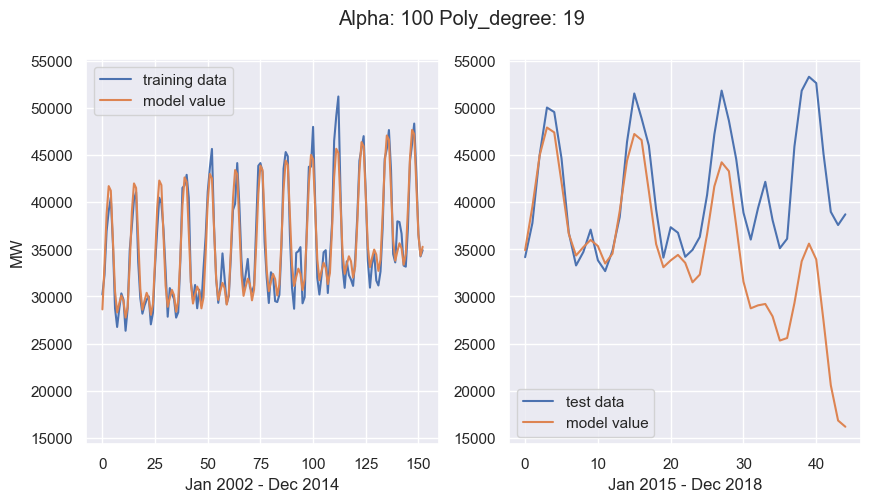

test MAE:  9058.96602777635
test MAPE:  21.15618441405853


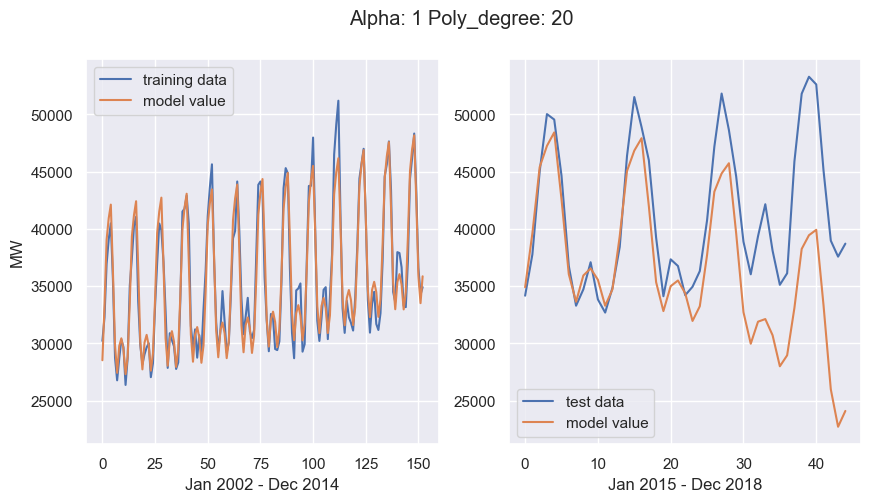

test MAE:  7912.79536360518
test MAPE:  18.47072613013636


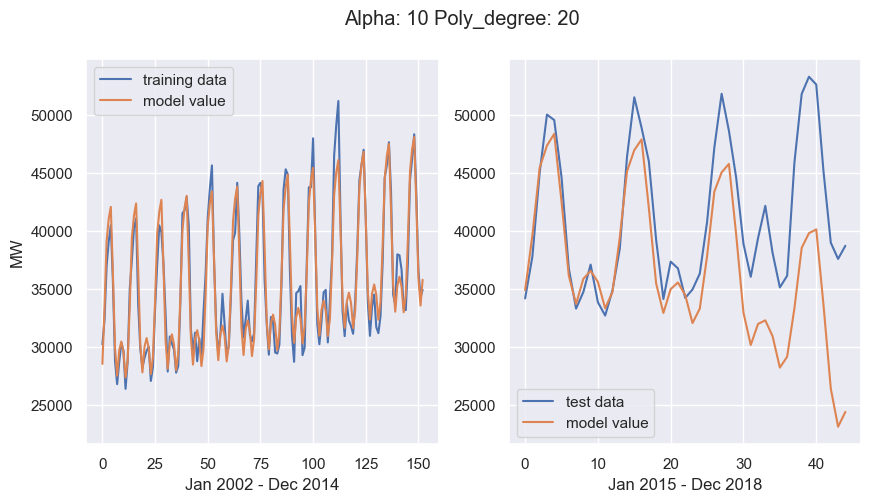

test MAE:  7849.394266372943
test MAPE:  18.32514971159462


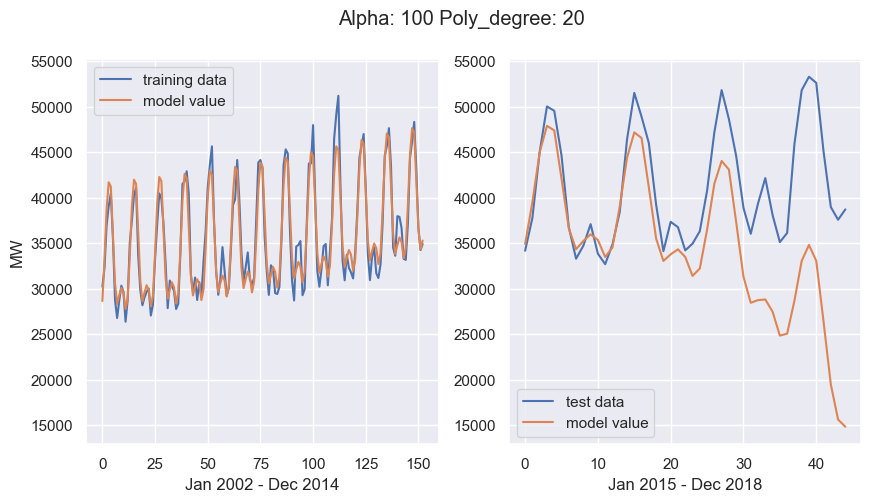

test MAE:  9291.265301389847
test MAPE:  21.72107304878521


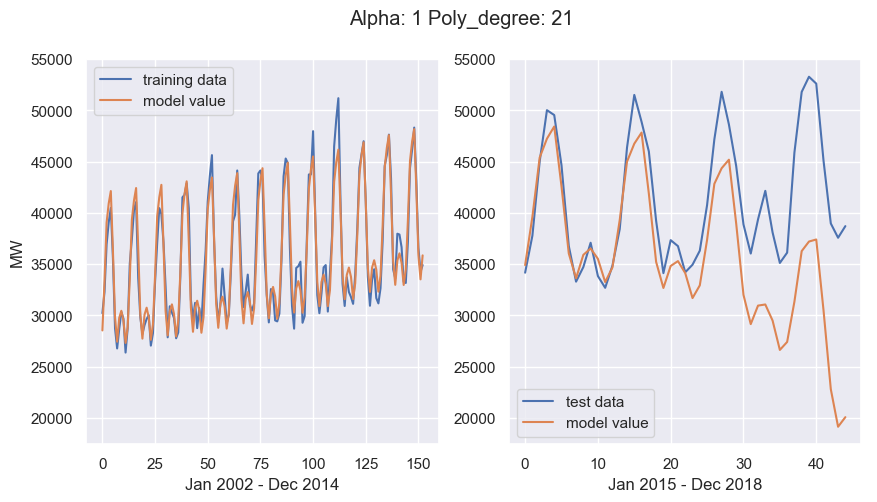

test MAE:  8459.170552527528
test MAPE:  19.763093202114312


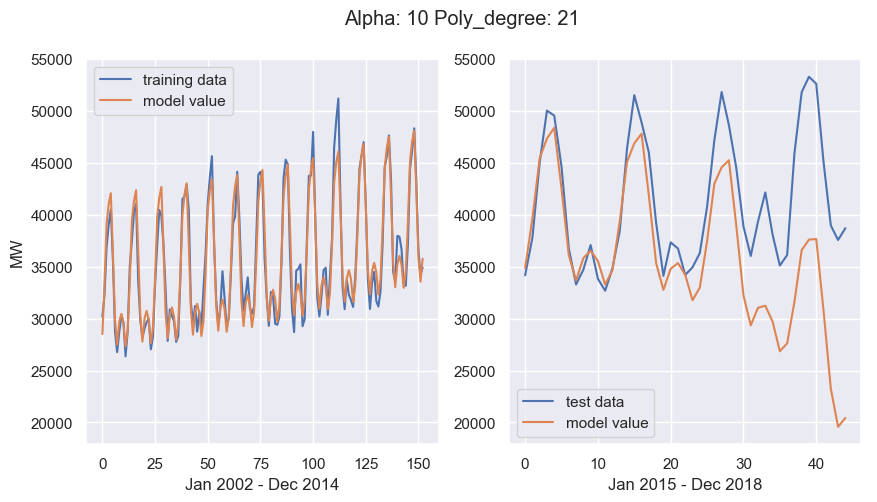

test MAE:  8372.585271355521
test MAPE:  19.560128579348294


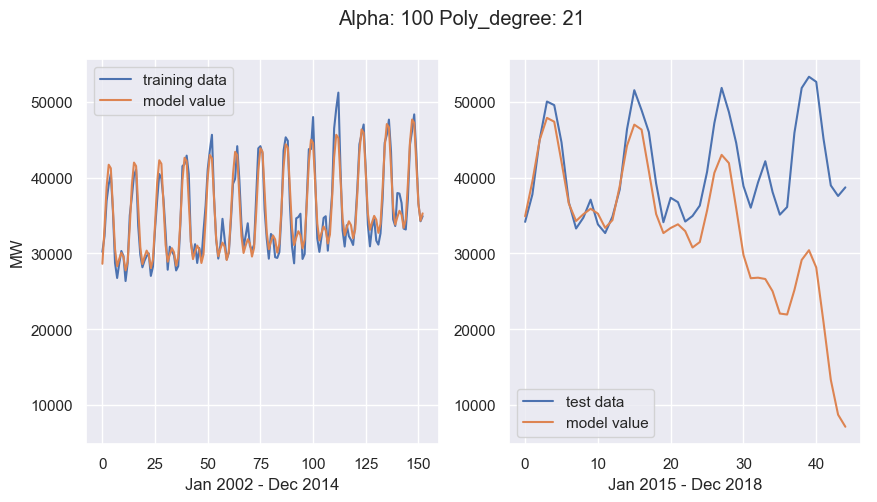

test MAE:  10657.310057024732
test MAPE:  25.06657633252311


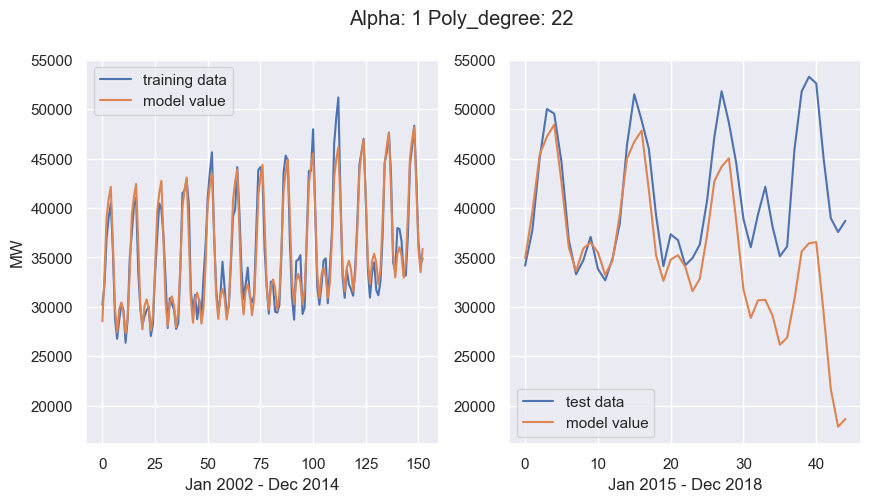

test MAE:  8660.713296808499
test MAPE:  20.245206607838316


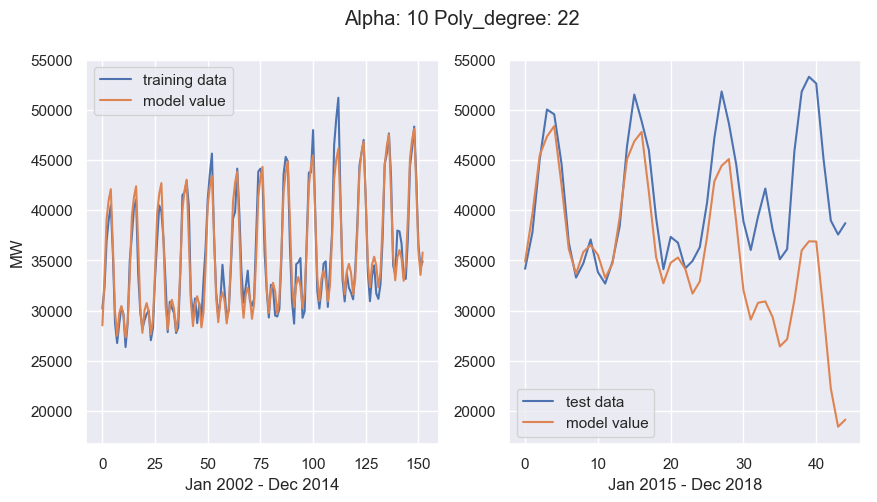

test MAE:  8554.536980917754
test MAPE:  19.994026976651135


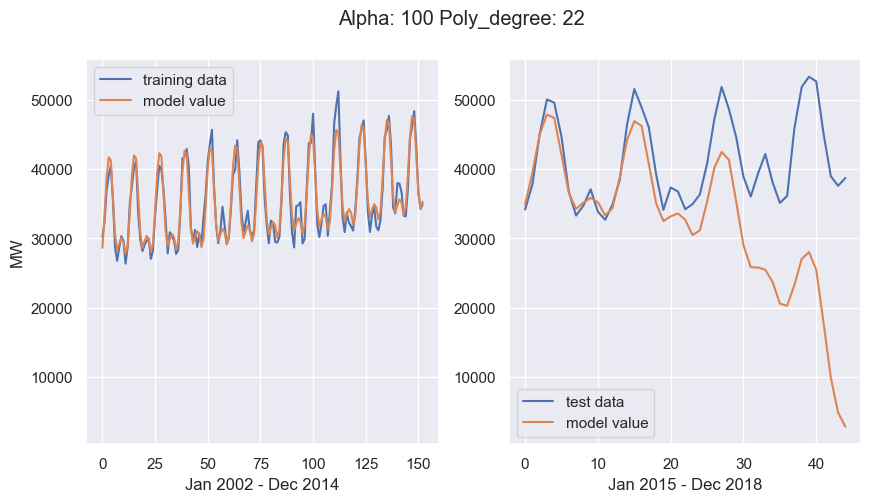

test MAE:  11404.623298991895
test MAPE:  26.902429017379564


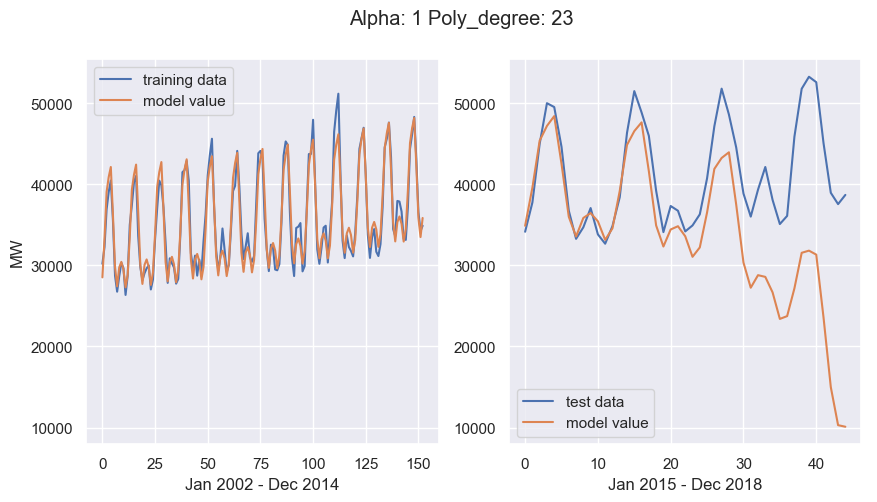

test MAE:  10010.409466420648
test MAPE:  23.52954134186498


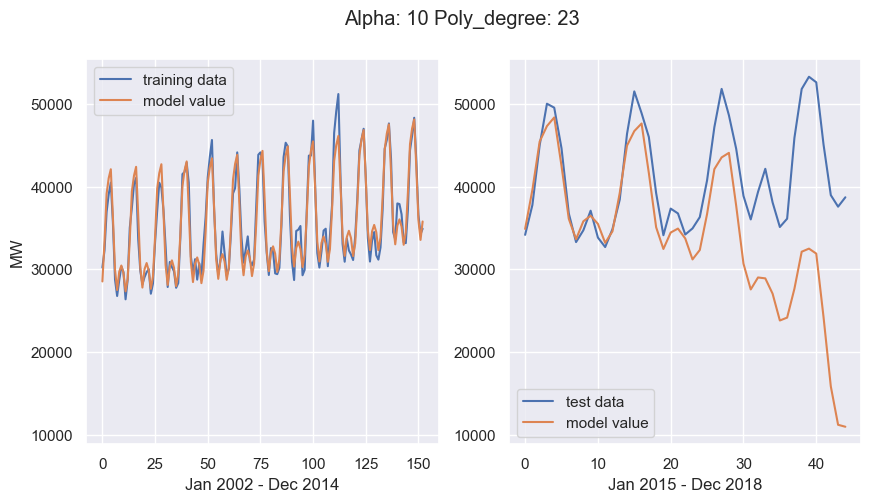

test MAE:  9825.543390160688
test MAPE:  23.078736869363468


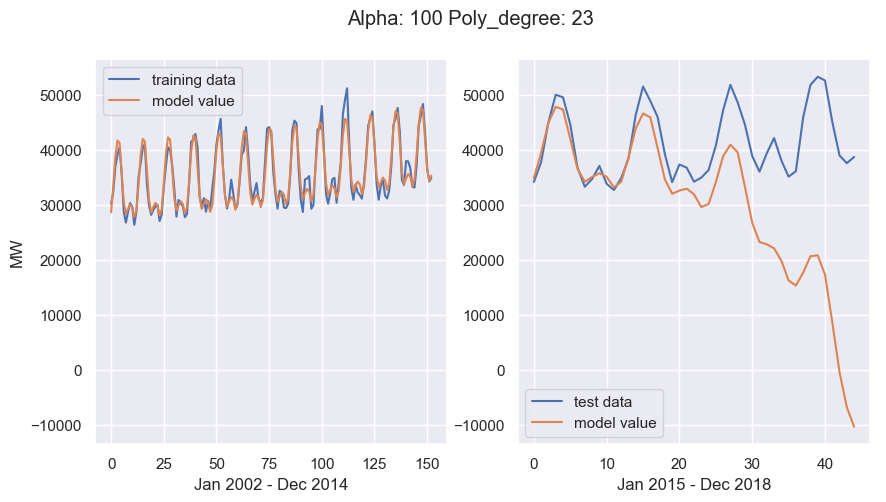

test MAE:  13686.651268015723
test MAPE:  32.517310399568245


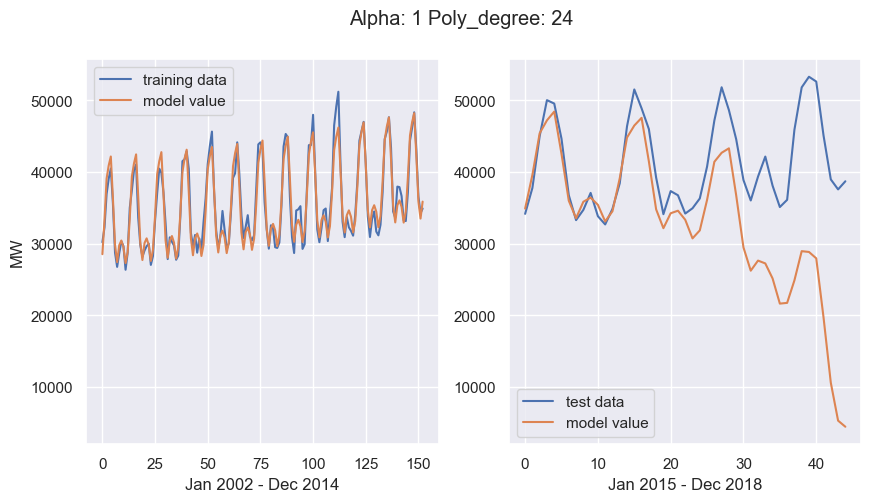

test MAE:  10930.87320332438
test MAPE:  25.79171664339205


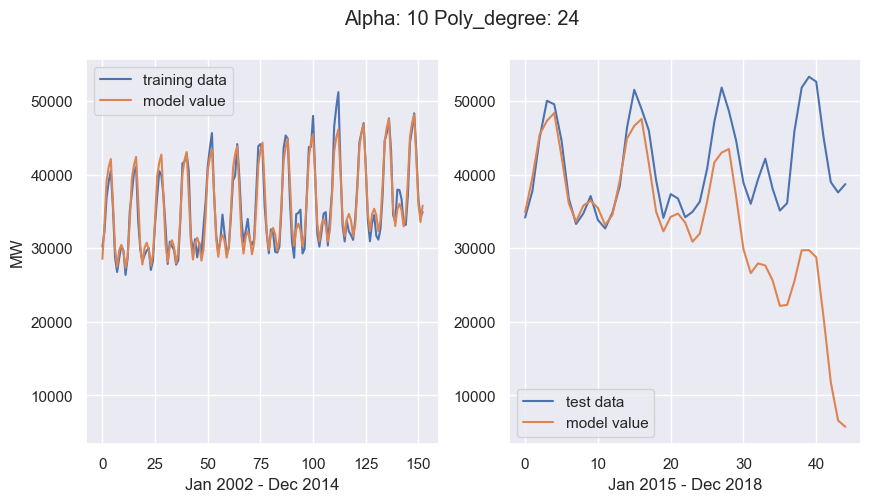

test MAE:  10676.289136500885
test MAPE:  25.169056277573322


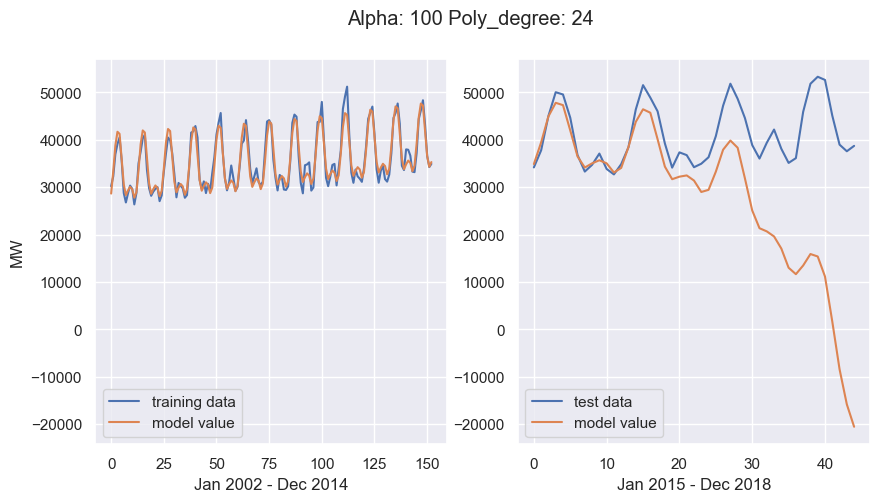

test MAE:  15419.751820854952
test MAPE:  36.79093730657414


In [74]:
# LASSO regression
# Test performance of different alpha and poly_degree value combination

# Configurable parameters
poly_degree = np.arange(1, 25, 1)
alpha_value = [1, 10, 100]

mape_a_test = []
mape_p_test = []
mape_y_test = []

for p in poly_degree:

    x_train = []
    for i in range(156 - 3):
        t_0 = poly_basis_single_sample(x_train_raw[i], p).flatten()
        t_1 = poly_basis_single_sample(x_train_raw[i + 1], p).flatten()
        t_2 = poly_basis_single_sample(x_train_raw[i + 2], p).flatten()
        x_train.append(np.concatenate((t_0, t_1, t_2)))

    x_train = np.asarray(x_train)
    y_train = y_train_raw[3:]
    
    x_test = []
    for i in range(48 - 3):
        t_0 = poly_basis_single_sample(x_test_raw[i], p).flatten()
        t_1 = poly_basis_single_sample(x_test_raw[i + 1], p).flatten()
        t_2 = poly_basis_single_sample(x_test_raw[i + 2], p).flatten()
        x_test.append(np.concatenate((t_0, t_1, t_2)))

    x_test = np.asarray(x_test)
    y_test = y_test_raw[3:]

    for a in alpha_value:    
        lasso_regressor = linear_model.Lasso(alpha = a, fit_intercept = False, tol = 0.01, max_iter = 10000)
        lasso_regressor.fit(x_train, y_train)
        w = lasso_regressor.coef_

        f, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))
        
        ax1 = plt.subplot(121)
        plt.plot(y_train, label = "training data")    
        plt.plot(x_train.dot(w), label = "model value")
        plt.xlabel("Jan 2002 - Dec 2014")
        plt.ylabel("MW")
        plt.legend()

        ax2 = plt.subplot(122, sharey = ax1)
        plt.plot(y_test, label = "test data")
        plt.plot(x_test.dot(w), label = "model value")
        plt.xlabel("Jan 2015 - Dec 2018")
        plt.legend()
        
        f.suptitle("Alpha: " + str(a) + " " + "Poly_degree: " + str(p))
        plt.show()

        y_true = y_test
        y_pred = x_test.dot(w)
        mae_test = mean_absolute_error(y_true, y_pred)
        mape_test = mean_absolute_percentage_error(y_true, y_pred)
        print("test MAE: ", mae_test)
        print("test MAPE: ", mape_test)

        mape_a_test.append(a)
        mape_p_test.append(p)
        mape_y_test.append(mape_test)

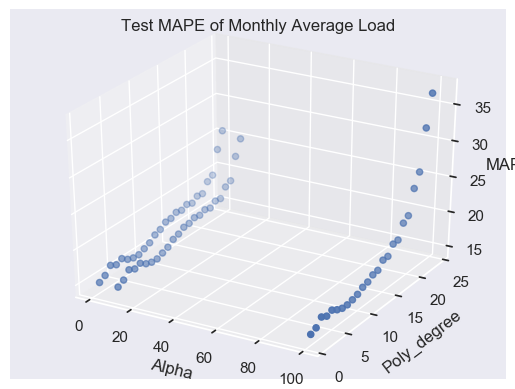

In [75]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mape_a_test, mape_p_test, mape_y_test)
ax.set_xlabel("Alpha")
ax.set_ylabel("Poly_degree")
ax.set_zlabel("MAPE")
plt.title("Test MAPE of Monthly Average Load")
plt.show()

In [76]:
mape_a_test = np.expand_dims(mape_a_test, axis = 1)
mape_p_test = np.expand_dims(mape_p_test, axis = 1)
mape_y_test = np.expand_dims(mape_y_test, axis = 1)
mape_test_arr = np.concatenate((mape_a_test, mape_p_test, mape_y_test), axis = 1)
np.set_printoptions(suppress = True)
mape_test_df = pd.DataFrame(data = mape_test_arr, columns = ["Alpha", "Poly_degree", "MAPE"])
print("Test MAPE of Monthly Average Load:")
print(mape_test_df)

Test MAPE of Monthly Average Load:
    Alpha  Poly_degree       MAPE
0     1.0          1.0  15.079862
1    10.0          1.0  15.063900
2   100.0          1.0  14.914126
3     1.0          2.0  15.572683
4    10.0          2.0  15.543333
5   100.0          2.0  15.277479
6     1.0          3.0  16.502310
7    10.0          3.0  16.493234
8   100.0          3.0  16.248352
9     1.0          4.0  16.077141
10   10.0          4.0  16.101824
11  100.0          4.0  15.819692
12    1.0          5.0  16.444802
13   10.0          5.0  16.399984
14  100.0          5.0  16.125983
15    1.0          6.0  15.821655
16   10.0          6.0  15.813109
17  100.0          6.0  15.634720
18    1.0          7.0  15.519651
19   10.0          7.0  15.515658
20  100.0          7.0  15.294790
21    1.0          8.0  15.471376
22   10.0          8.0  15.482713
23  100.0          8.0  15.238202
24    1.0          9.0  15.830174
25   10.0          9.0  15.824607
26  100.0          9.0  15.421680
27    1.0    

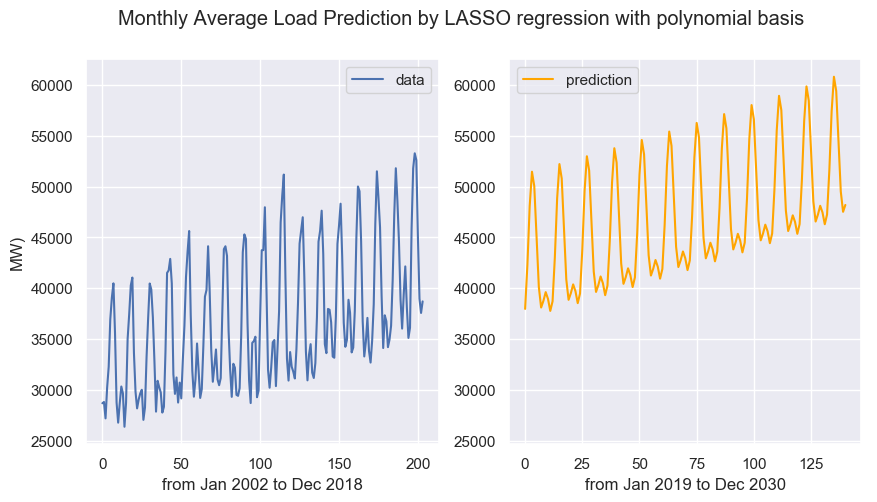

In [77]:
# Prediction

# Get weight value
# Alpha and poly_degree value to get lowest MAPE
a = 100
p = 2

x_train = []
for i in range(156 - 3):
    t_0 = poly_basis_single_sample(x_train_raw[i], p).flatten()
    t_1 = poly_basis_single_sample(x_train_raw[i + 1], p).flatten()
    t_2 = poly_basis_single_sample(x_train_raw[i + 2], p).flatten()
    x_train.append(np.concatenate((t_0, t_1, t_2)))

x_train = np.asarray(x_train)
y_train = y_train_raw[3:]

lasso_regressor = linear_model.Lasso(alpha = a, fit_intercept = False, tol = 0.01, max_iter = 10000)
lasso_regressor.fit(x_train, y_train)
w = lasso_regressor.coef_

x_pred = np.array([range(205, 349)]).T

# Combine sine and cosine feature
x_pred = sine_cosine_feature(x_pred, 12)

x_pred_order = []
for i in range(144 - 3):
    t_0 = poly_basis_single_sample(x_pred[i], p).flatten()
    t_1 = poly_basis_single_sample(x_pred[i + 1], p).flatten()
    t_2 = poly_basis_single_sample(x_pred[i + 2], p).flatten()
    x_pred_order.append(np.concatenate((t_0, t_1, t_2)))  
    
x_pred_order = np.asarray(x_pred_order)

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))

ax1 = plt.subplot(121)
plt.plot(data_y, label = "data")
plt.xlabel("from Jan 2002 to Dec 2018")
plt.ylabel("MW)")
plt.legend()

ax2 = plt.subplot(122, sharey = ax1)
plt.plot(x_pred_order.dot(w), color = "orange", label = "prediction")
plt.xlabel("from Jan 2019 to Dec 2030")
plt.legend()

f.suptitle("Monthly Average Load Prediction by LASSO regression with polynomial basis")
plt.show()